In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model
    
    

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    return model

In [8]:
discriminator = make_discriminator_model()
generator = make_generator_model()
generator_discriminator = keras.models.Model(inputs=generator.input, outputs=discriminator(generator.output))

In [9]:
discriminator.compile(keras.optimizers.Adam(0.0001), "binary_crossentropy")
generator_discriminator.compile(keras.optimizers.Adam(0.0001), "binary_crossentropy")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [31]:
# minus mean / half of max
X_train = (X_train - 127.5) / 127.5

In [16]:
X_train = np.expand_dims(X_train, axis=3)
# (None, 28, 28) -> (None, 28, 28, 1)

In [48]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre',
    value=0.0
)



NameError: name 'train_captions' is not defined

In [ ]:
class ScaleLayer(tf.keras.layers.Layer):
def __init__(self):
    super(ScaleLayer, self).__init__()
    self.scale = tf.Variable(1.)

def call(self, inputs):
    return inputs * self.scale


Gen loss: 0.6910769492387772  -  Disc loss: 0.652432031929493


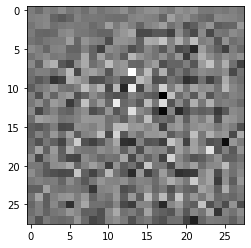

Gen loss: 3.081786870956421  -  Disc loss: 0.0340220311190933


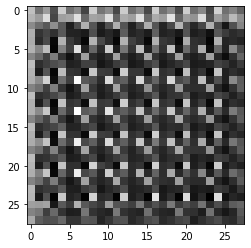

Gen loss: 6.684716105461121  -  Disc loss: 0.001219370897160843


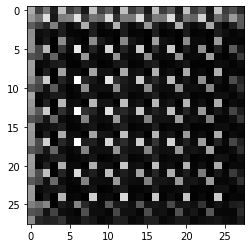

Gen loss: 7.47667932510376  -  Disc loss: 0.0005231867799011525


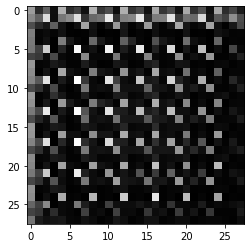

Gen loss: 7.08090615272522  -  Disc loss: 0.0007390654427581467


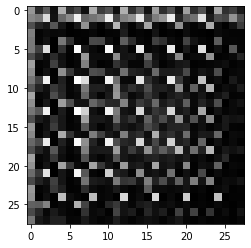

Gen loss: 4.910381555557251  -  Disc loss: 0.01224630733486265


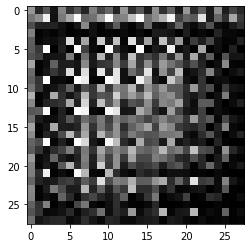

Gen loss: 0.03871543612331152  -  Disc loss: 1.479043584316969


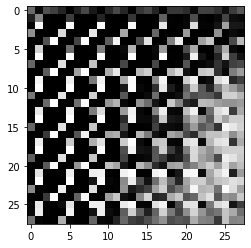

Gen loss: 3.935453712940216  -  Disc loss: 0.09216559054266327


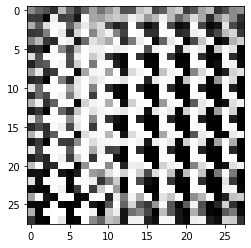

Gen loss: 0.0019904840737581253  -  Disc loss: 3.119326936081052


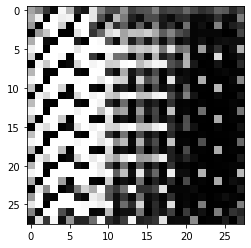

Gen loss: 0.005221778526902199  -  Disc loss: 2.631980940233916


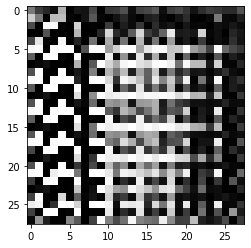

Gen loss: 0.0033850245526991785  -  Disc loss: 2.868065409362316


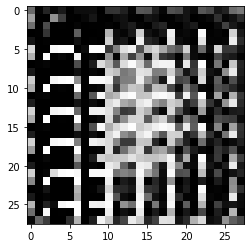

Gen loss: 0.004574650665745139  -  Disc loss: 2.7521642111241817


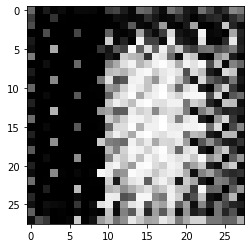

Gen loss: 0.051172652281820774  -  Disc loss: 1.6803815122693777


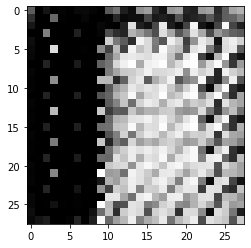

Gen loss: 0.03289550915360451  -  Disc loss: 1.9388601556420326


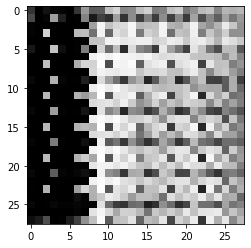

Gen loss: 0.0025836449931375682  -  Disc loss: 2.970708205466508


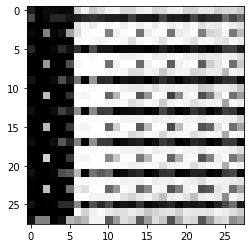

Gen loss: 9.736437823448796e-05  -  Disc loss: 4.3666126687894575


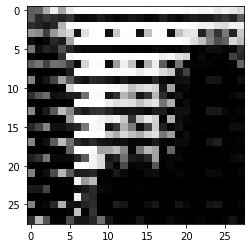

Gen loss: 1.1689269244670868  -  Disc loss: 0.18321939607267268


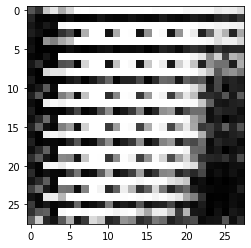

Gen loss: 0.0001214026578963967  -  Disc loss: 4.3989915263696275


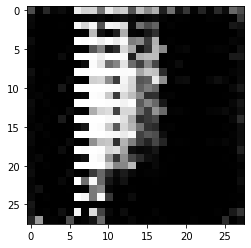

Gen loss: 0.0021742014796473086  -  Disc loss: 3.0861743623390794


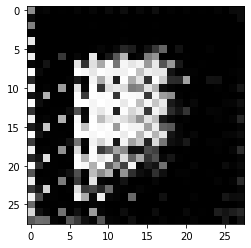

Gen loss: 0.002201126015279442  -  Disc loss: 3.0814778027124703


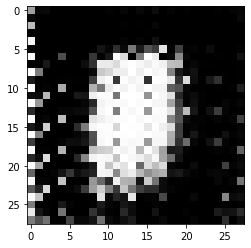

Gen loss: 0.002740795200224966  -  Disc loss: 2.9712925357744098


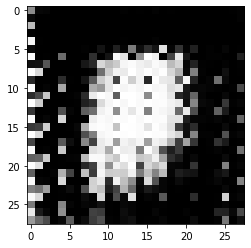

Gen loss: 0.002993730071466416  -  Disc loss: 2.92384151276201


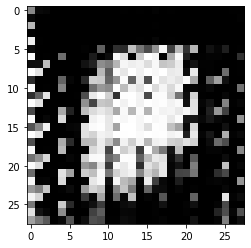

Gen loss: 0.0029771652189083397  -  Disc loss: 2.913632674375549


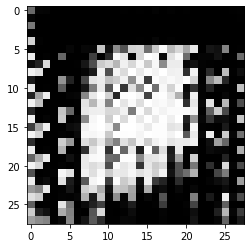

Gen loss: 0.00330528017366305  -  Disc loss: 2.8670829392503947


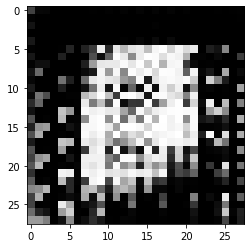

Gen loss: 0.003708186442963779  -  Disc loss: 2.8316184813156724


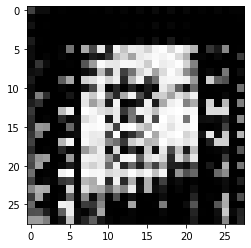

Gen loss: 0.004664533538743854  -  Disc loss: 2.747166134417057


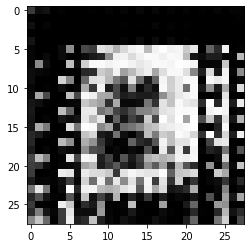

Gen loss: 0.0029907948919571936  -  Disc loss: 2.9163261335343122


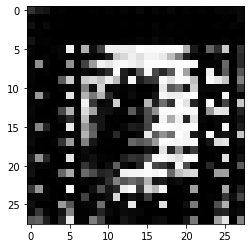

Gen loss: 0.0030243591754697263  -  Disc loss: 2.9487214647233486


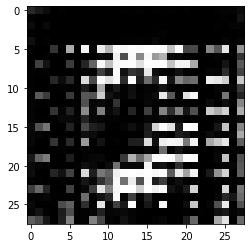

Gen loss: 0.002681101963389665  -  Disc loss: 2.998326752334833


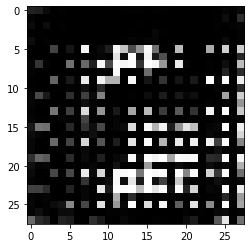

Gen loss: 0.00267872546100989  -  Disc loss: 2.9952001376077533


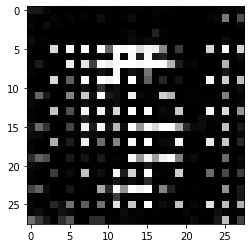

Gen loss: 0.002596035716123879  -  Disc loss: 2.9922172725200653


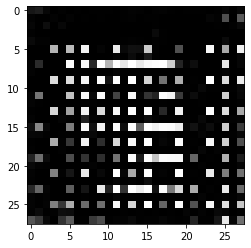

Gen loss: 0.0025802553282119334  -  Disc loss: 2.99802850256674


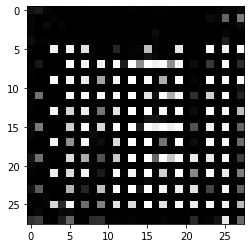

Gen loss: 0.002447011007461697  -  Disc loss: 3.0177951995283365


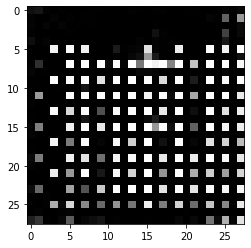

Gen loss: 0.0027800797251984477  -  Disc loss: 2.954365036683157


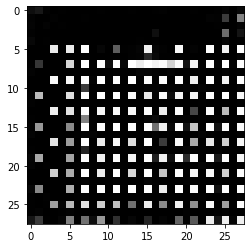

Gen loss: 0.002901195897720754  -  Disc loss: 2.930196938570589


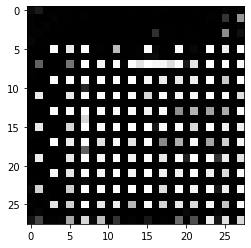

Gen loss: 0.003031111089512706  -  Disc loss: 2.91154707595706


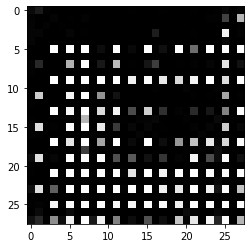

Gen loss: 0.003309250867459923  -  Disc loss: 2.846493924385868


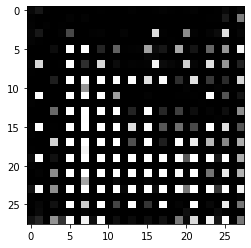

Gen loss: 0.002399116230662912  -  Disc loss: 3.0087322092149407


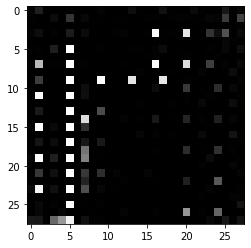

Gen loss: 0.0025794049142859876  -  Disc loss: 2.9842517517972738


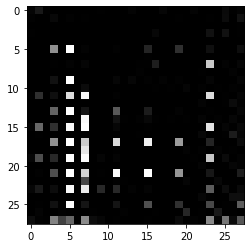

Gen loss: 0.0025480755721218884  -  Disc loss: 2.9902040602173656


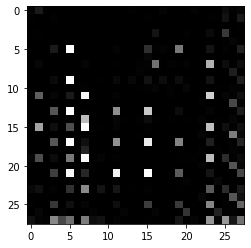

Gen loss: 0.0028151891310699284  -  Disc loss: 2.9425207023741677


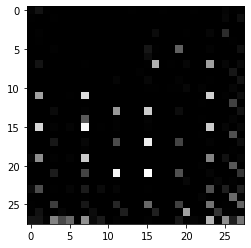

Gen loss: 0.00317305198404938  -  Disc loss: 2.87996526400093


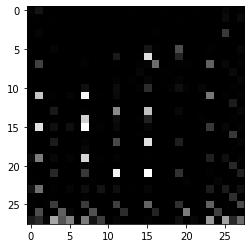

Gen loss: 0.00279598671477288  -  Disc loss: 2.9442620463087223


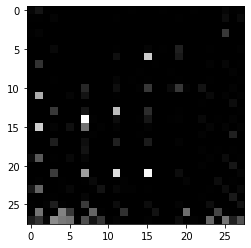

Gen loss: 0.0031837743590585887  -  Disc loss: 2.879247313714586


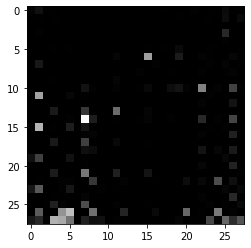

Gen loss: 0.0028908402309753  -  Disc loss: 2.9272244145395234


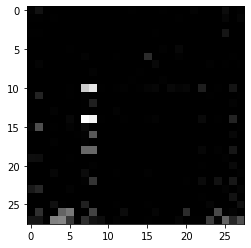

Gen loss: 0.003051834588404745  -  Disc loss: 2.900414408009965


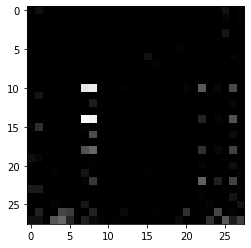

Gen loss: 0.003239357436541468  -  Disc loss: 2.869807379145641


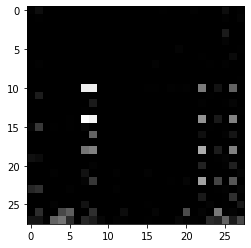

Gen loss: 0.0019878396997228265  -  Disc loss: 2.941482052206993


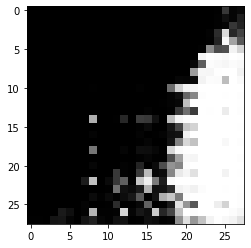

Gen loss: 0.5214772373437881  -  Disc loss: 0.7116566626937129


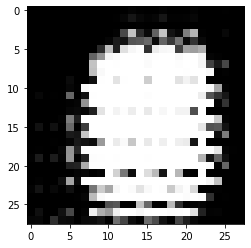

Gen loss: 0.0018185081135015935  -  Disc loss: 3.236303836107254


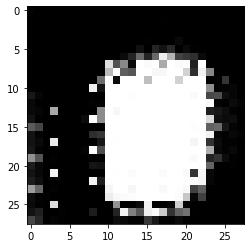

Gen loss: 0.0036111525841988623  -  Disc loss: 3.0070564970374107


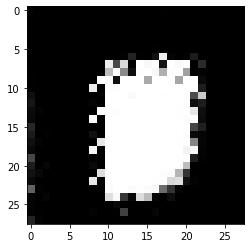

Gen loss: 0.0038538691587746143  -  Disc loss: 2.815549016930163


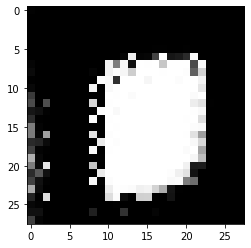

Gen loss: 0.004043667926453054  -  Disc loss: 2.813818330876529


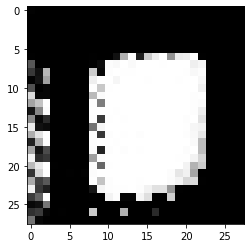

Gen loss: 0.004209267674013972  -  Disc loss: 2.772036924958229


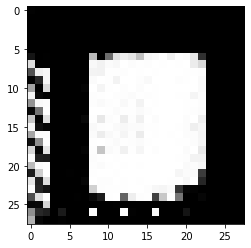

Gen loss: 0.0065944199450314045  -  Disc loss: 2.568106788210571


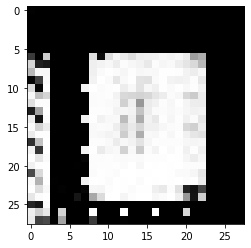

Gen loss: 0.003005723003298044  -  Disc loss: 2.919241045601666


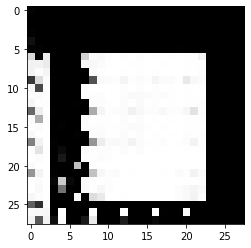

Gen loss: 0.0030874775256961584  -  Disc loss: 2.9017563986126333


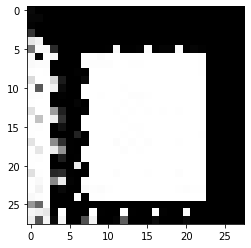

Gen loss: 0.003364499134477228  -  Disc loss: 2.856626324239187


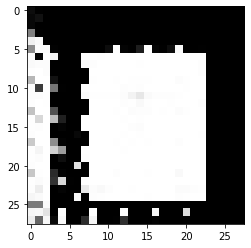

Gen loss: 0.00454068323597312  -  Disc loss: 2.6992521318607032


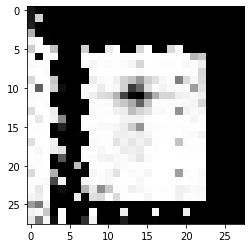

Gen loss: 0.0032982169650495052  -  Disc loss: 2.8695505352225155


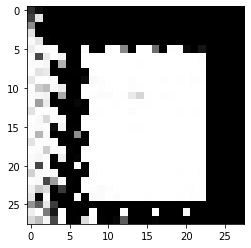

Gen loss: 0.0034475704887881875  -  Disc loss: 2.843525835778564


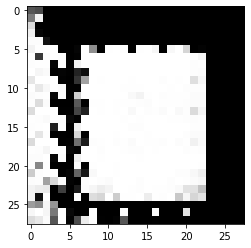

Gen loss: 0.0035291191306896508  -  Disc loss: 2.8332757777534425


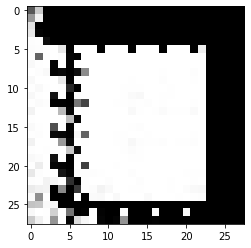

Gen loss: 0.0034406621125526726  -  Disc loss: 2.8410569234983996


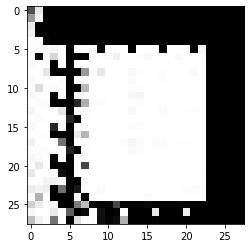

Gen loss: 0.003713484387844801  -  Disc loss: 2.8022998945089057


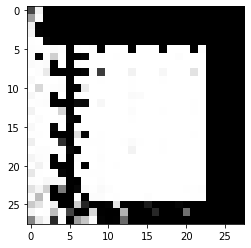

Gen loss: 0.0036943976301699877  -  Disc loss: 2.805377474287525


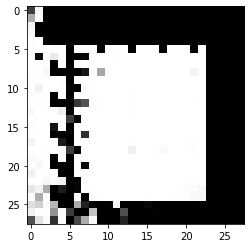

Gen loss: 0.010324976174160838  -  Disc loss: 2.3013919265940785


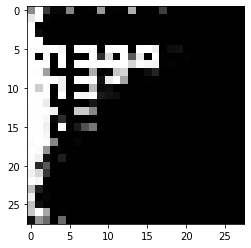

Gen loss: 0.0025194603949785233  -  Disc loss: 2.9650465636514127


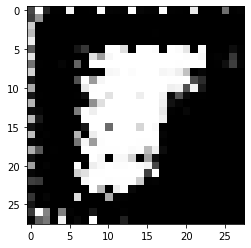

Gen loss: 0.0034202177193947136  -  Disc loss: 2.857273695524782


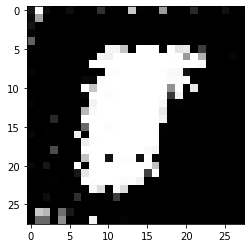

Gen loss: 0.0038153243949636817  -  Disc loss: 2.8115394450724125


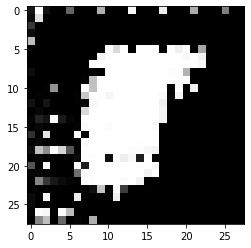

Gen loss: 0.003785126027651131  -  Disc loss: 2.8155419533140957


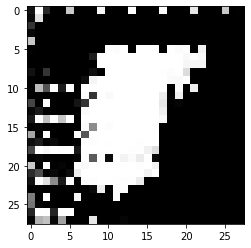

Gen loss: 0.004090320784598589  -  Disc loss: 2.7691332399845123


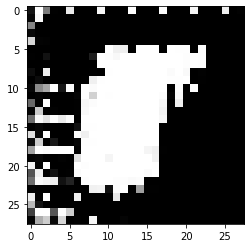

Gen loss: 0.004072986310347915  -  Disc loss: 2.7681046491488814


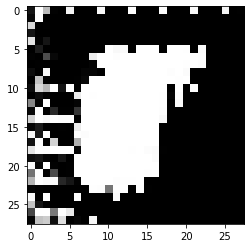

Gen loss: 0.003959589404985309  -  Disc loss: 2.7789063290692866


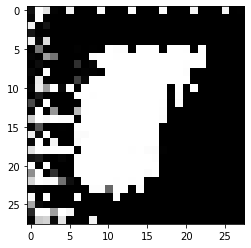

Gen loss: 0.004074816708453  -  Disc loss: 2.763526776107028


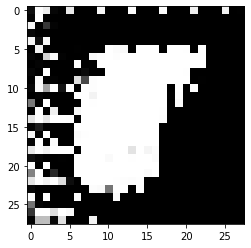

Gen loss: 0.004102710168808699  -  Disc loss: 2.759381656302139


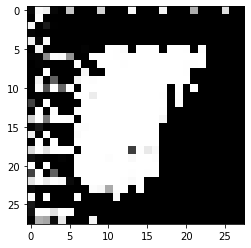

Gen loss: 0.004071698756888509  -  Disc loss: 2.759879204328172


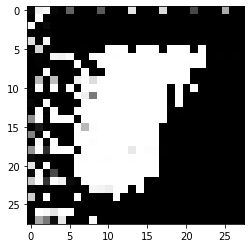

Gen loss: 0.004023042973130941  -  Disc loss: 2.7661805651150644


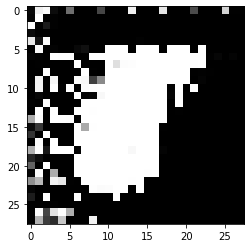

Gen loss: 0.0040652016177773476  -  Disc loss: 2.7596346992067993


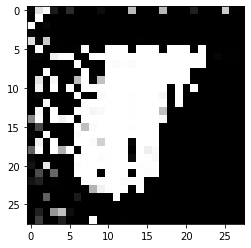

Gen loss: 0.004062278429046273  -  Disc loss: 2.7611775945406407


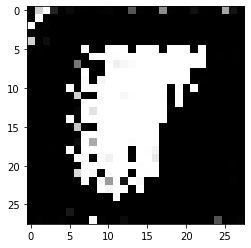

Gen loss: 0.00416594510897994  -  Disc loss: 2.7504971814341843


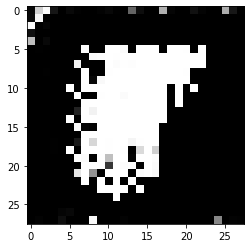

Gen loss: 0.00418943224940449  -  Disc loss: 2.747635064413771


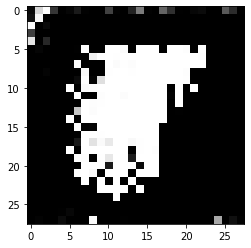

Gen loss: 0.004219899303279817  -  Disc loss: 2.743782638804987


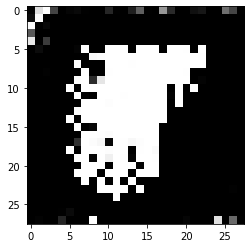

Gen loss: 0.004455394810065627  -  Disc loss: 2.716822698013857


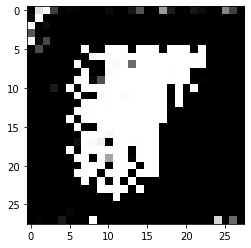

Gen loss: 0.0043809853959828615  -  Disc loss: 2.727957417955622


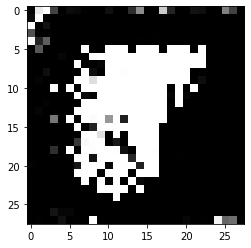

Gen loss: 0.004394512274302542  -  Disc loss: 2.7251614378765225


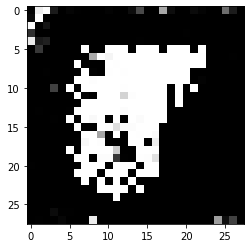

Gen loss: 0.004385057487525046  -  Disc loss: 2.723900143057108


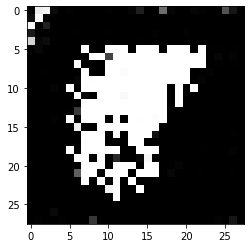

Gen loss: 0.004286749637685716  -  Disc loss: 2.7414608856197447


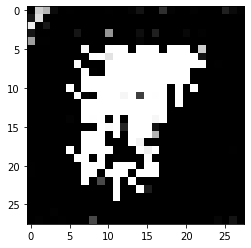

Gen loss: 0.004312662407755852  -  Disc loss: 2.7348093858454376


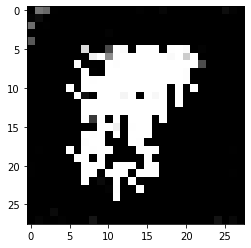

Gen loss: 0.004508215584792197  -  Disc loss: 2.7129717632196844


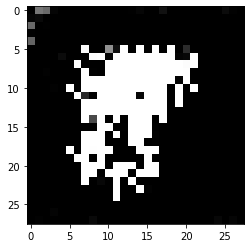

Gen loss: 0.004435780690982938  -  Disc loss: 2.719407098600641


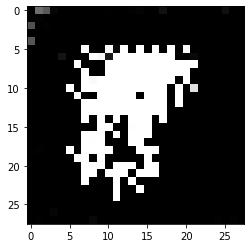

Gen loss: 0.0045776552287861705  -  Disc loss: 2.7036804945673794


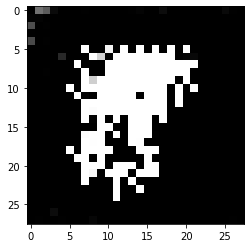

Gen loss: 0.004569214070215821  -  Disc loss: 2.7046913928352296


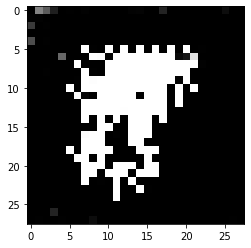

Gen loss: 0.004659583675675094  -  Disc loss: 2.6943315307144076


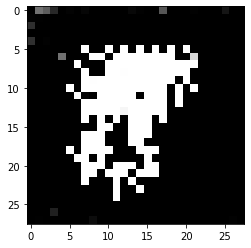

Gen loss: 0.004703523009084165  -  Disc loss: 2.6897011406254023


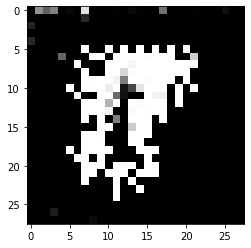

Gen loss: 0.004472551518119872  -  Disc loss: 2.7165366117842495


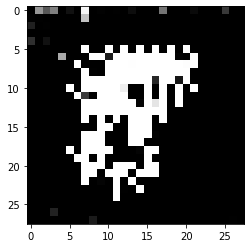

Gen loss: 0.004737882991321385  -  Disc loss: 2.687925143633038


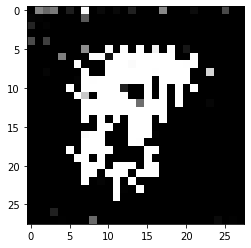

Gen loss: 0.004623988992534578  -  Disc loss: 2.698492295574397


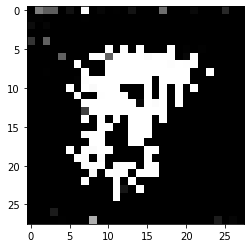

Gen loss: 0.004639106802642345  -  Disc loss: 2.6965160442050546


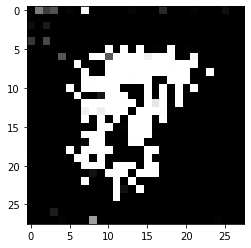

Gen loss: 0.0048944002483040094  -  Disc loss: 2.6705344622023404


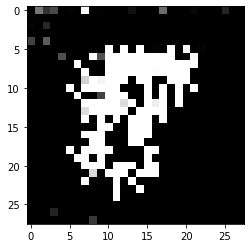

Gen loss: 0.004731469438411295  -  Disc loss: 2.6866078583989292


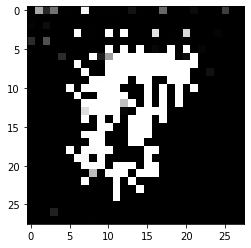

Gen loss: 0.004749101004563272  -  Disc loss: 2.6860776096582413


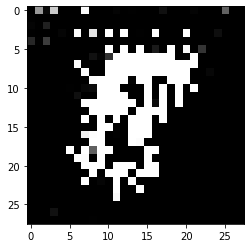

Gen loss: 0.004901847918517888  -  Disc loss: 2.670816829893738


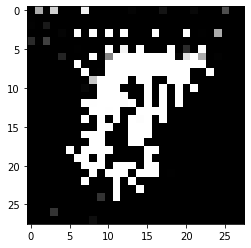

Gen loss: 0.004818926565349102  -  Disc loss: 2.6784232889767736


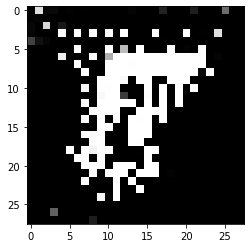

Gen loss: 0.004811856662854552  -  Disc loss: 2.677767741959542


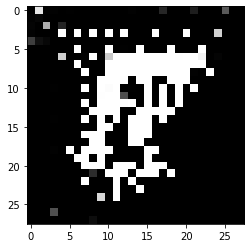

Gen loss: 0.004755707457661629  -  Disc loss: 2.683440615888685


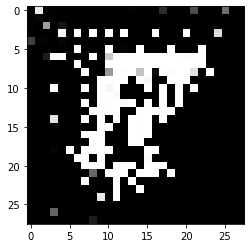

Gen loss: 0.004788037505932152  -  Disc loss: 2.6796580718364567


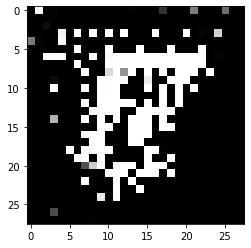

Gen loss: 0.004850990138947964  -  Disc loss: 2.67345128452871


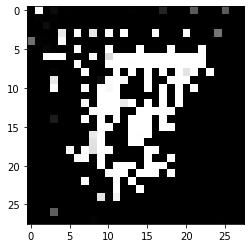

Gen loss: 0.004783977754414082  -  Disc loss: 2.6792631704593077


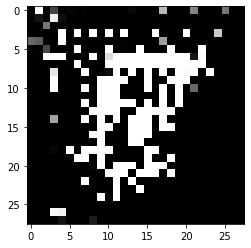

Gen loss: 0.004751558182761073  -  Disc loss: 2.6834108831826597


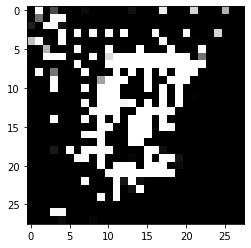

Gen loss: 0.004793928121216595  -  Disc loss: 2.6801269876305014


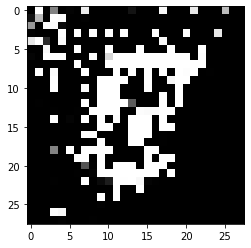

Gen loss: 0.004896388272754848  -  Disc loss: 2.6697961257304996


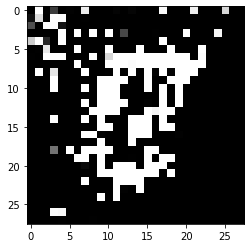

Gen loss: 0.004925211542285979  -  Disc loss: 2.6666699876077473


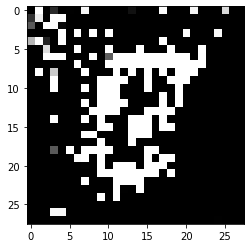

Gen loss: 0.005184621782973409  -  Disc loss: 2.6397720872191712


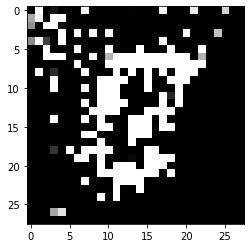

Gen loss: 0.005011119646951556  -  Disc loss: 2.6555600514402613


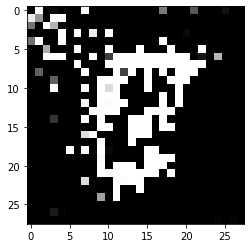

Gen loss: 0.004945080145262182  -  Disc loss: 2.663344315486029


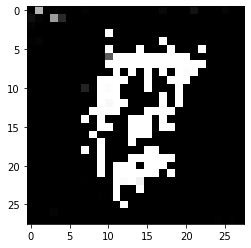

Gen loss: 0.0049829932395368814  -  Disc loss: 2.6601092093624175


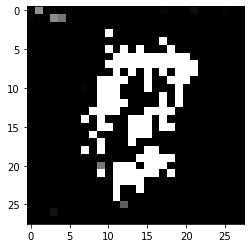

Gen loss: 0.005005132406949997  -  Disc loss: 2.6588145550340414


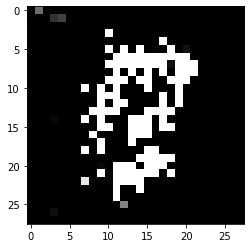

Gen loss: 0.004984837840311229  -  Disc loss: 2.660593864042312


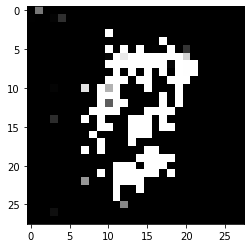

Gen loss: 0.00509503239300102  -  Disc loss: 2.6498670261353254


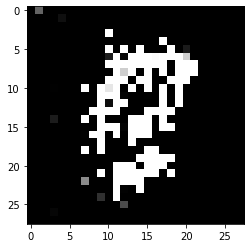

Gen loss: 0.0051882992265746  -  Disc loss: 2.63945181411691


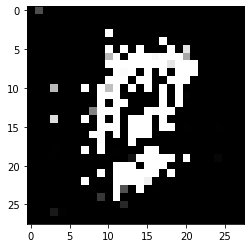

Gen loss: 0.0052084269700571895  -  Disc loss: 2.6389511940069497


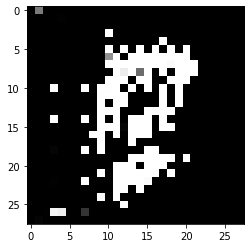

Gen loss: 0.005087211728096008  -  Disc loss: 2.6504707087296993


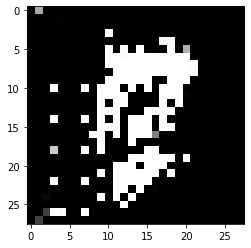

Gen loss: 0.00505278049968183  -  Disc loss: 2.6546606661286205


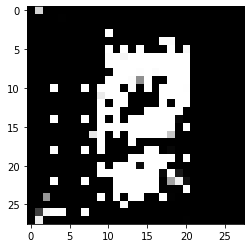

Gen loss: 0.0047113640466704965  -  Disc loss: 2.6841530262026936


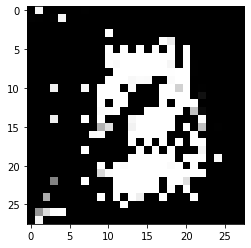

Gen loss: 0.0048034555511549115  -  Disc loss: 2.680332094663754


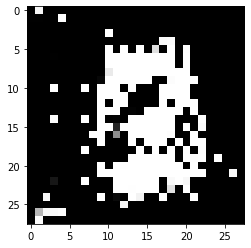

Gen loss: 0.005016855080612004  -  Disc loss: 2.657265444751829


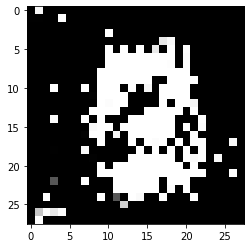

Gen loss: 0.005039395880885422  -  Disc loss: 2.655303968116641


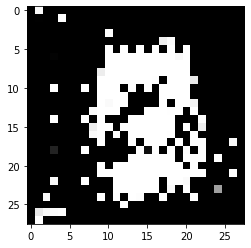

Gen loss: 0.0050095440819859505  -  Disc loss: 2.6586722577922046


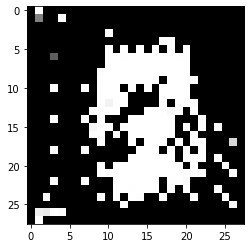

Gen loss: 0.00503734580706805  -  Disc loss: 2.655022812075913


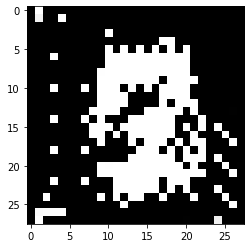

Gen loss: 0.005033309455029666  -  Disc loss: 2.6542550831800327


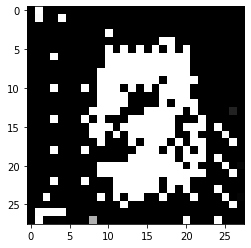

Gen loss: 0.00520120223518461  -  Disc loss: 2.6370916581945494


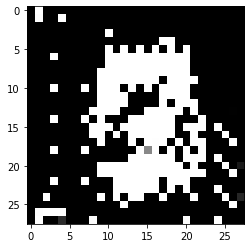

Gen loss: 0.0053319064900279045  -  Disc loss: 2.6240407458972186


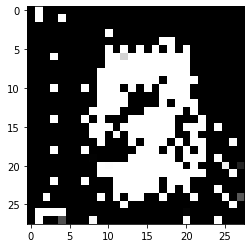

Gen loss: 0.005271353991702199  -  Disc loss: 2.6290490294341


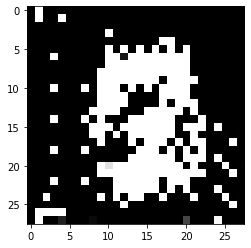

Gen loss: 0.005239080172032118  -  Disc loss: 2.6317788190208375


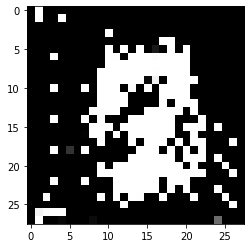

Gen loss: 0.005275554722175002  -  Disc loss: 2.6281211676541716


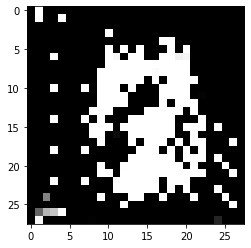

Gen loss: 0.005292666959576309  -  Disc loss: 2.6265934627735987


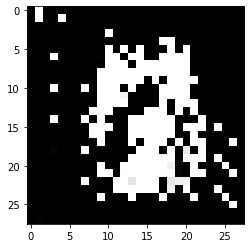

Gen loss: 0.005278540542349219  -  Disc loss: 2.6283847599988803


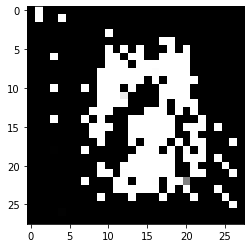

Gen loss: 0.005274638417176902  -  Disc loss: 2.6295579017605633


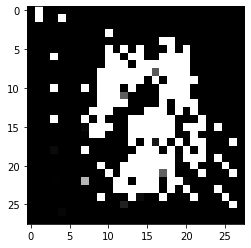

Gen loss: 0.005267844768241048  -  Disc loss: 2.630452155834064


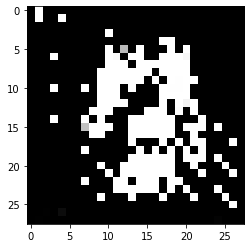

Gen loss: 0.005449717864394188  -  Disc loss: 2.6136073800735176


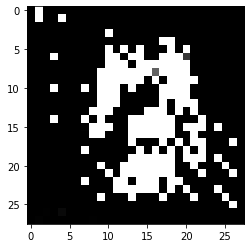

Gen loss: 0.005312396795488894  -  Disc loss: 2.6256658419733867


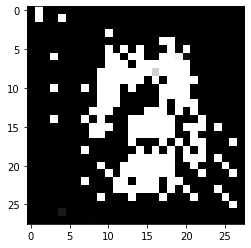

Gen loss: 0.005459674866870046  -  Disc loss: 2.6122049499535933


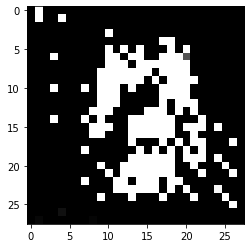

Gen loss: 0.005477122031152248  -  Disc loss: 2.6103616395266727


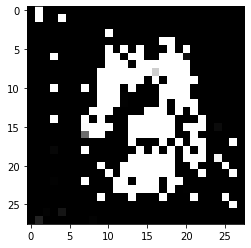

Gen loss: 0.00548391102347523  -  Disc loss: 2.60929057339672


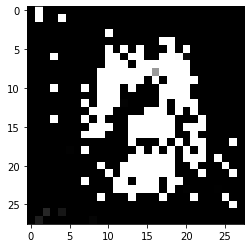

Gen loss: 0.005576677736826241  -  Disc loss: 2.6016554076923057


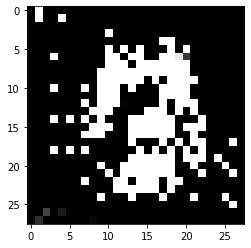

Gen loss: 0.005492060212418437  -  Disc loss: 2.6086482160026208


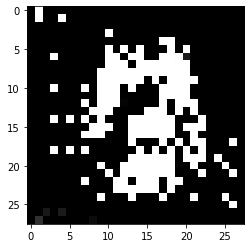

Gen loss: 0.005463962792418897  -  Disc loss: 2.610877156141214


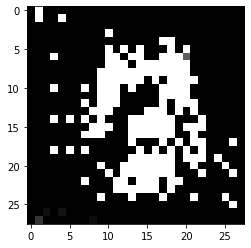

Gen loss: 0.0056540381629019976  -  Disc loss: 2.594050594023429


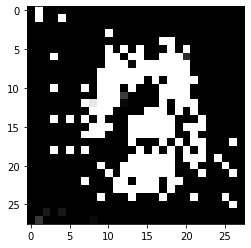

Gen loss: 0.0056485236855223775  -  Disc loss: 2.594967375858687


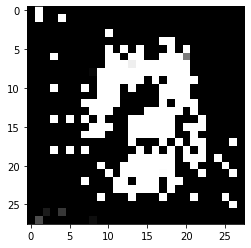

Gen loss: 0.005434167920611799  -  Disc loss: 2.615042935241945


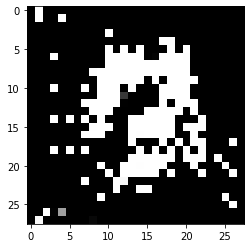

Gen loss: 0.005631885374896228  -  Disc loss: 2.5966986666899174


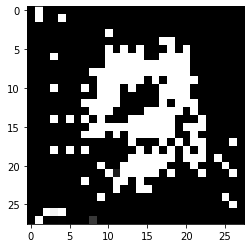

Gen loss: 0.00563957542181015  -  Disc loss: 2.5959649711148813


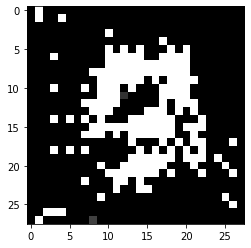

Gen loss: 0.005520121427252889  -  Disc loss: 2.606004971312359


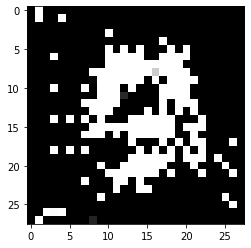

Gen loss: 0.005618421011604369  -  Disc loss: 2.5971660235663876


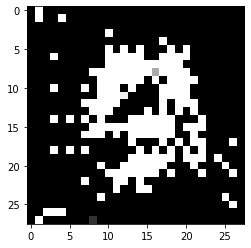

Gen loss: 0.005626056692562997  -  Disc loss: 2.596476698992774


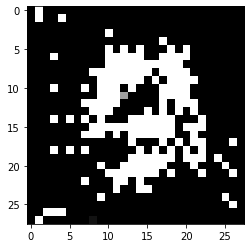

Gen loss: 0.005679594352841377  -  Disc loss: 2.591964235762134


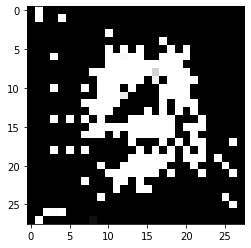

Gen loss: 0.005644120741635561  -  Disc loss: 2.5944828608771786


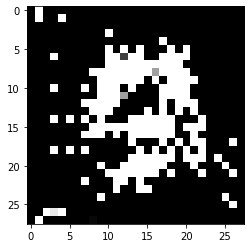

Gen loss: 0.005676013650372624  -  Disc loss: 2.5915662589250132


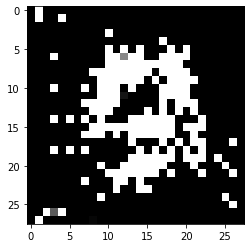

Gen loss: 0.005736551363952458  -  Disc loss: 2.586227201507427


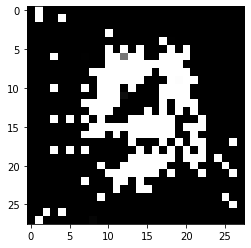

Gen loss: 0.005526802618987858  -  Disc loss: 2.6070375266717747


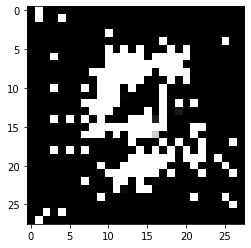

Gen loss: 0.005399873596616089  -  Disc loss: 2.617480492917821


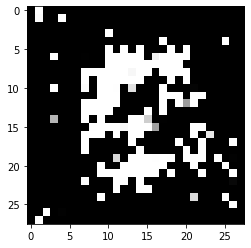

Gen loss: 0.005534133524633944  -  Disc loss: 2.6055212705396116


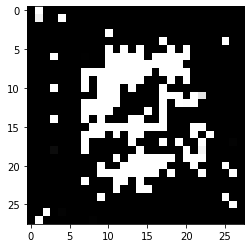

Gen loss: 0.005635973648168147  -  Disc loss: 2.5961679382016882


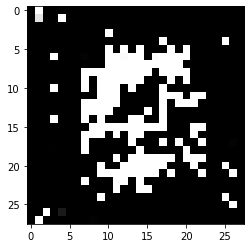

Gen loss: 0.0056484052911400795  -  Disc loss: 2.595212249434553


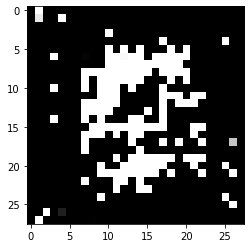

Gen loss: 0.005583669175393879  -  Disc loss: 2.600525121903047


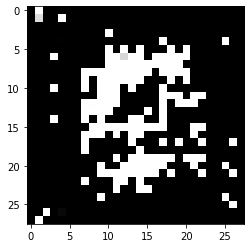

Gen loss: 0.00565574353095144  -  Disc loss: 2.593909636605531


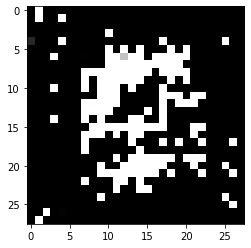

Gen loss: 0.0057290083495900035  -  Disc loss: 2.587535742786713


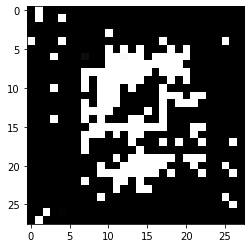

Gen loss: 0.005776925012469292  -  Disc loss: 2.583274381933734


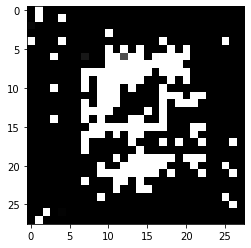

Gen loss: 0.005728018935769796  -  Disc loss: 2.5875043731648475


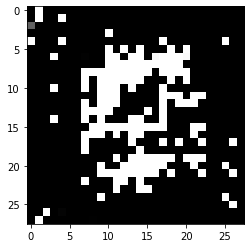

Gen loss: 0.0057035182835534215  -  Disc loss: 2.5895327524049208


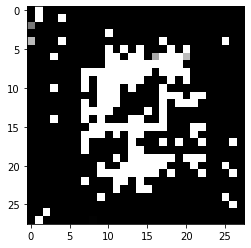

Gen loss: 0.005741937551647425  -  Disc loss: 2.5858884011395276


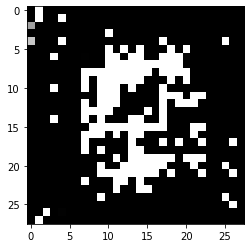

Gen loss: 0.005749282776378095  -  Disc loss: 2.5852351303910837


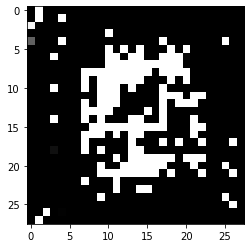

Gen loss: 0.005767958820797503  -  Disc loss: 2.58406380424276


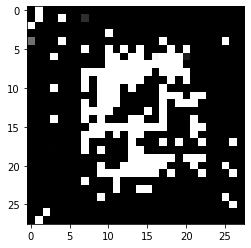

Gen loss: 0.005795730277895927  -  Disc loss: 2.5817539199488238


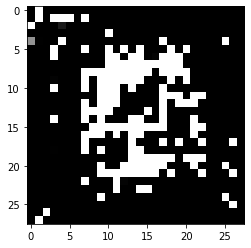

Gen loss: 0.005766040645539761  -  Disc loss: 2.5836127971997485


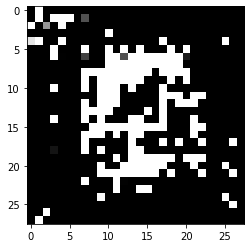

Gen loss: 0.005886285332962871  -  Disc loss: 2.573364438372664


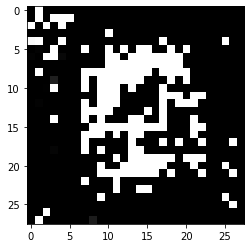

Gen loss: 0.005856715841218829  -  Disc loss: 2.576234018430114


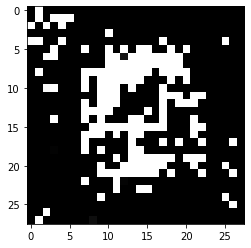

Gen loss: 0.005762605927884579  -  Disc loss: 2.583742523798719


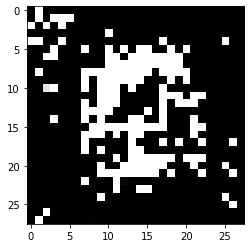

Gen loss: 0.005894728470593691  -  Disc loss: 2.5726616111351177


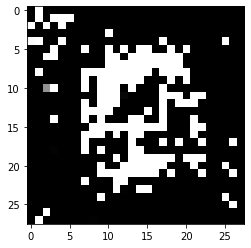

Gen loss: 0.005857880809344351  -  Disc loss: 2.5752868740819395


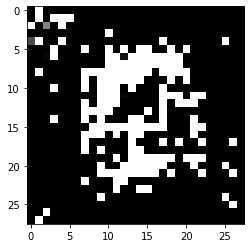

Gen loss: 0.005863545113243163  -  Disc loss: 2.5748605204280466


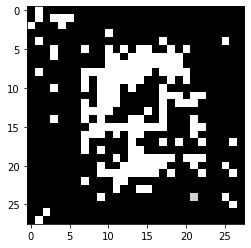

Gen loss: 0.005905384197831154  -  Disc loss: 2.5716457832604647


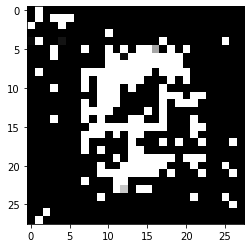

Gen loss: 0.0058895155088976026  -  Disc loss: 2.5726229907595553


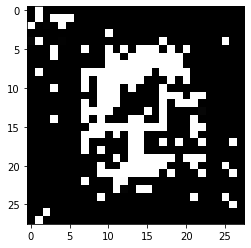

Gen loss: 0.005886051920242608  -  Disc loss: 2.5732243649545126


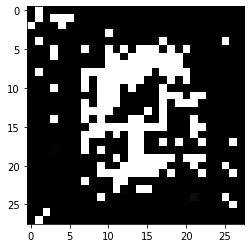

Gen loss: 0.005924644181504846  -  Disc loss: 2.5697454164619558


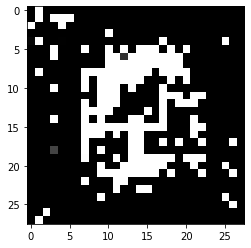

Gen loss: 0.005976737476885319  -  Disc loss: 2.5655265701934695


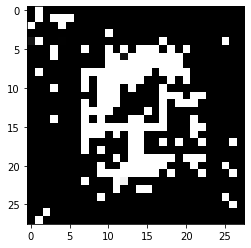

Gen loss: 0.005968100507743657  -  Disc loss: 2.5658235690789297


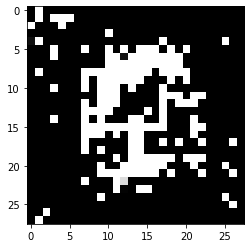

Gen loss: 0.00591534236446023  -  Disc loss: 2.5704943710006773


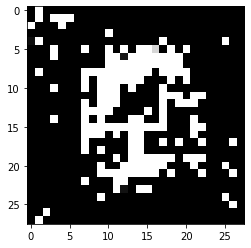

Gen loss: 0.0059442751808092  -  Disc loss: 2.5677825978491455


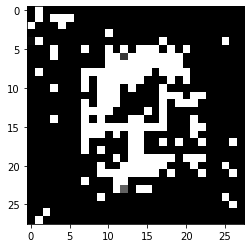

Gen loss: 0.005925598670728505  -  Disc loss: 2.569582762022037


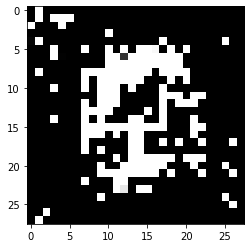

Gen loss: 0.005929555860348046  -  Disc loss: 2.569155989564024


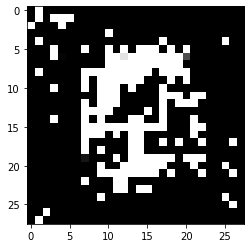

Gen loss: 0.0059395539574325085  -  Disc loss: 2.5684523856034502


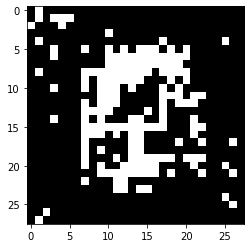

Gen loss: 0.005975334672257304  -  Disc loss: 2.565583006013185


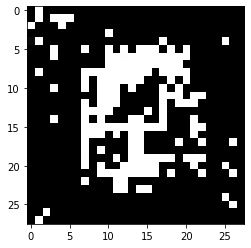

Gen loss: 0.006001593894325197  -  Disc loss: 2.563801735290326


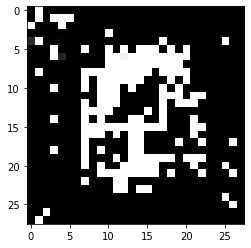

Gen loss: 0.005994592676870525  -  Disc loss: 2.563969579525292


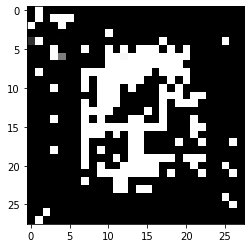

Gen loss: 0.005948941339738667  -  Disc loss: 2.5677355710067786


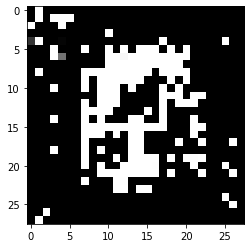

Gen loss: 0.005922051495872438  -  Disc loss: 2.5697765112272464


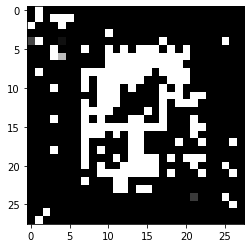

Gen loss: 0.0060219697188586  -  Disc loss: 2.561496869311668


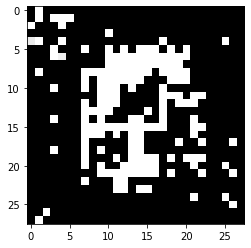

Gen loss: 0.006000834400765598  -  Disc loss: 2.5630533505463973


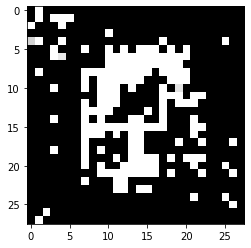

Gen loss: 0.006046285619959235  -  Disc loss: 2.5600469424389303


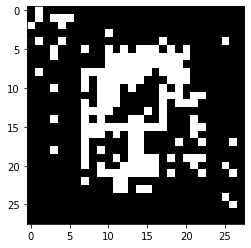

Gen loss: 0.005983545212075114  -  Disc loss: 2.56450904259691


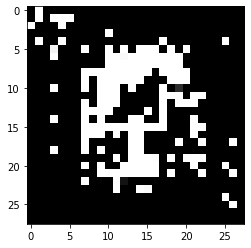

Gen loss: 0.005998921114951372  -  Disc loss: 2.563495512411464


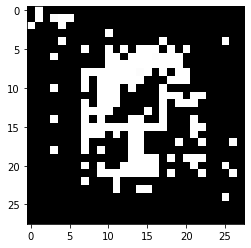

Gen loss: 0.005188094452023506  -  Disc loss: 2.6367768368218094


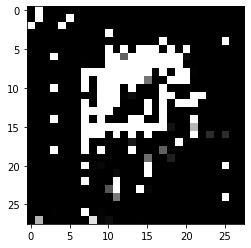

Gen loss: 0.005463643232360482  -  Disc loss: 2.613550894660875


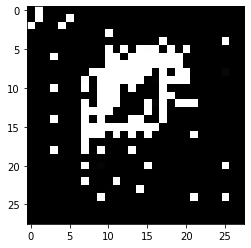

Gen loss: 0.005561366677284241  -  Disc loss: 2.6057090568356216


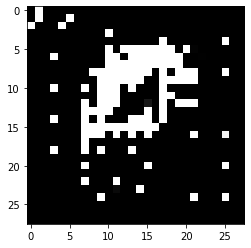

Gen loss: 0.005769433220848441  -  Disc loss: 2.5870876498520374


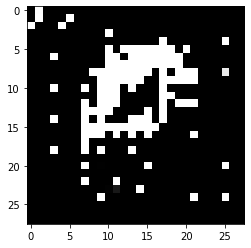

Gen loss: 0.005728153279051185  -  Disc loss: 2.5901040375465527


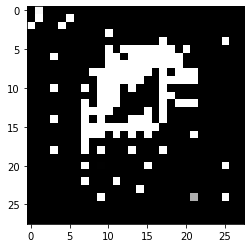

Gen loss: 0.005718513042666018  -  Disc loss: 2.590842927340418


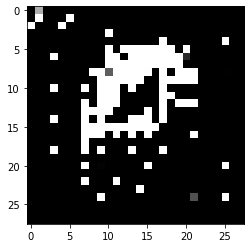

Gen loss: 0.005760959233157337  -  Disc loss: 2.5871621966362


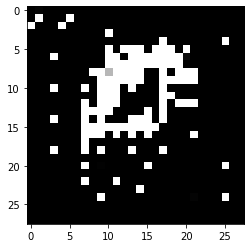

Gen loss: 0.0057457274524495006  -  Disc loss: 2.588497583172284


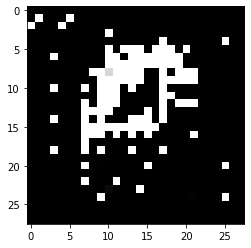

Gen loss: 0.005746833048760891  -  Disc loss: 2.5877332352101803


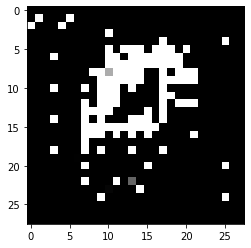

Gen loss: 0.005830385140143335  -  Disc loss: 2.58061630721204


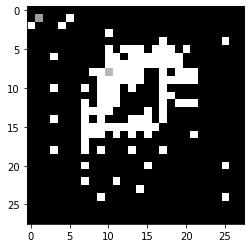

Gen loss: 0.0058316574431955814  -  Disc loss: 2.5802913735387847


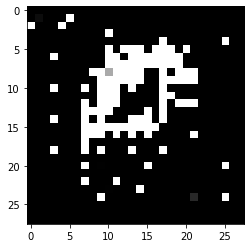

Gen loss: 0.005807867390103638  -  Disc loss: 2.5823137981351465


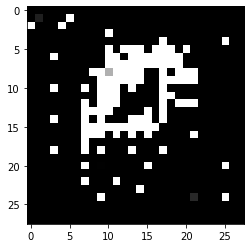

Gen loss: 0.005842013866640627  -  Disc loss: 2.5790501860901713


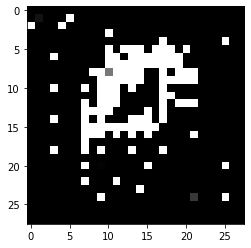

Gen loss: 0.005792676005512476  -  Disc loss: 2.5831620193785056


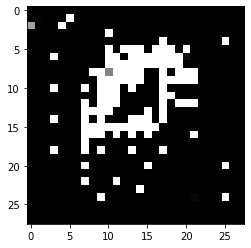

Gen loss: 0.0058718707878142595  -  Disc loss: 2.5764775179559365


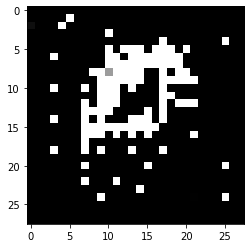

Gen loss: 0.005946833756752312  -  Disc loss: 2.5700260249432176


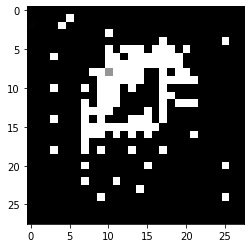

Gen loss: 0.005805850378237665  -  Disc loss: 2.5814648697851226


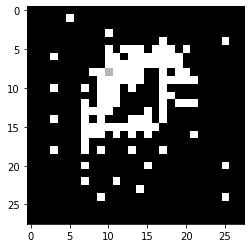

Gen loss: 0.005967205623164773  -  Disc loss: 2.5682755153393373


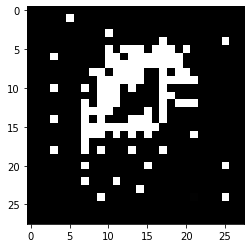

Gen loss: 0.0058515401324257255  -  Disc loss: 2.577686055796221


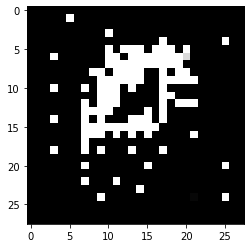

Gen loss: 0.005855159950442612  -  Disc loss: 2.5774508750764653


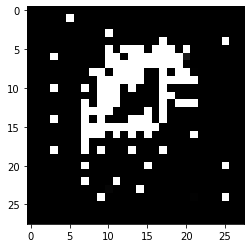

Gen loss: 0.005916876252740622  -  Disc loss: 2.5722891305340454


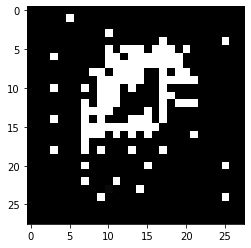

Gen loss: 0.005882597411982715  -  Disc loss: 2.5747806425206363


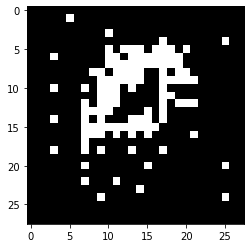

Gen loss: 0.005985142779536545  -  Disc loss: 2.5662649121368304


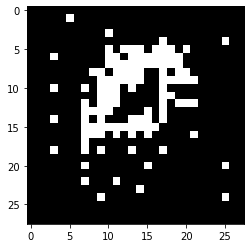

Gen loss: 0.005924888770096004  -  Disc loss: 2.5710523785091937


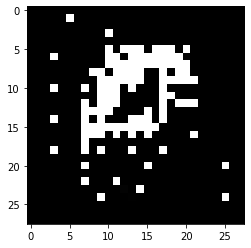

Gen loss: 0.0058334998320788145  -  Disc loss: 2.57889311038889


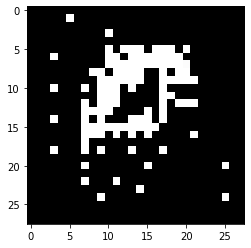

Gen loss: 0.005880038719624281  -  Disc loss: 2.5750028593465686


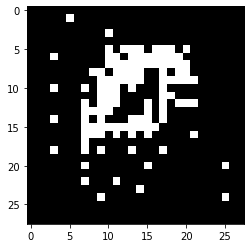

Gen loss: 0.005920232506468892  -  Disc loss: 2.5713405064307153


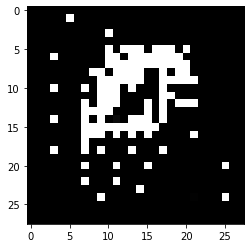

Gen loss: 0.0058916229754686356  -  Disc loss: 2.573791426490061


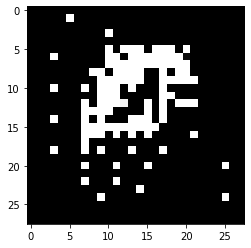

Gen loss: 0.005900304182432592  -  Disc loss: 2.572997522656806


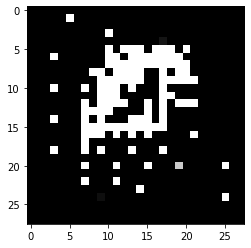

Gen loss: 0.00592673069331795  -  Disc loss: 2.5707588833756745


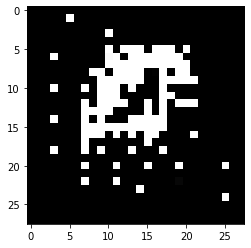

Gen loss: 0.0058750814059749246  -  Disc loss: 2.5729890594957396


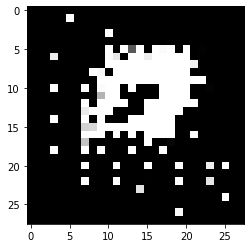

Gen loss: 0.005101726856082678  -  Disc loss: 2.6483061793260276


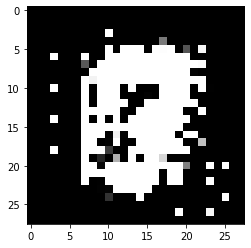

Gen loss: 0.005280175944790244  -  Disc loss: 2.6331115453504026


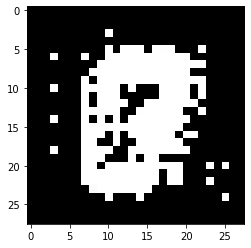

Gen loss: 0.005563873099163175  -  Disc loss: 2.605702752713114


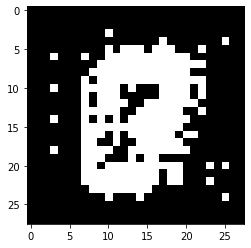

Gen loss: 0.005754013662226498  -  Disc loss: 2.588050960795954


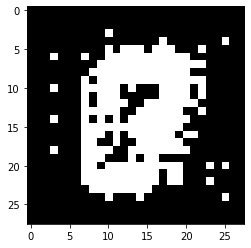

Gen loss: 0.005885274964384735  -  Disc loss: 2.5762350698933005


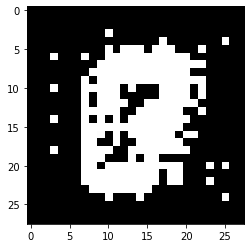

Gen loss: 0.0060127509059384465  -  Disc loss: 2.5651417709887028


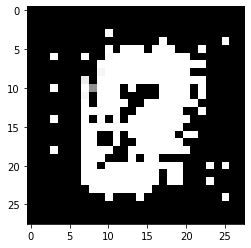

Gen loss: 0.005866279941983521  -  Disc loss: 2.5770007569808513


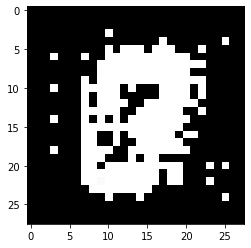

Gen loss: 0.005923477117903531  -  Disc loss: 2.571713372017257


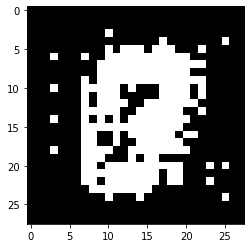

Gen loss: 0.005983521929010749  -  Disc loss: 2.5667579256696627


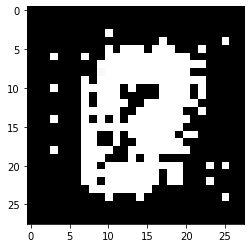

Gen loss: 0.005985705531202257  -  Disc loss: 2.5662141155917197


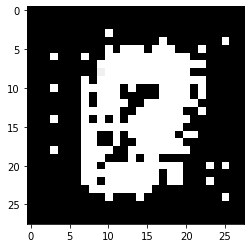

Gen loss: 0.006046748021617532  -  Disc loss: 2.5611113351769745


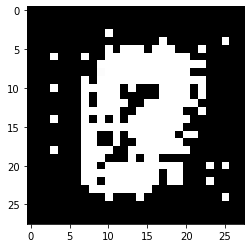

Gen loss: 0.006017019390128553  -  Disc loss: 2.563681355677545


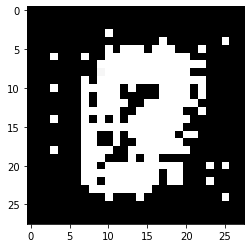

Gen loss: 0.006105604465119541  -  Disc loss: 2.5559153344947845


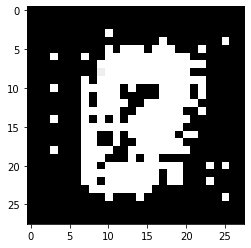

Gen loss: 0.006065461202524602  -  Disc loss: 2.5591934551484883


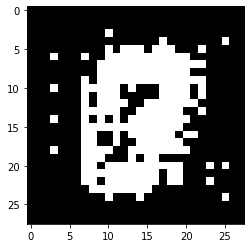

Gen loss: 0.006019166088663042  -  Disc loss: 2.5629070883151144


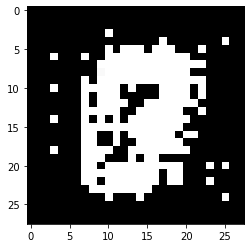

Gen loss: 0.006118239602074027  -  Disc loss: 2.554732493008487


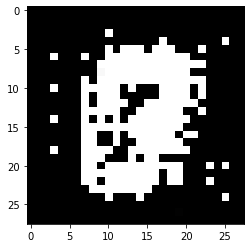

Gen loss: 0.00609248096588999  -  Disc loss: 2.5561930199619383


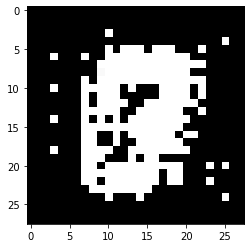

Gen loss: 0.006152831367217004  -  Disc loss: 2.551736088935286


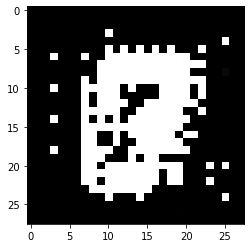

Gen loss: 0.006195633439347148  -  Disc loss: 2.5482970234006643


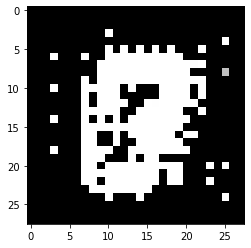

Gen loss: 0.006122725899331272  -  Disc loss: 2.554183905944228


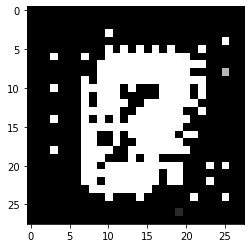

Gen loss: 0.006023869151249528  -  Disc loss: 2.562393984408118


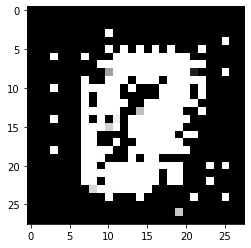

Gen loss: 0.006060994113795459  -  Disc loss: 2.5590309544932097


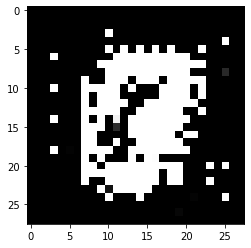

Gen loss: 0.006100871600210667  -  Disc loss: 2.5561222524847835


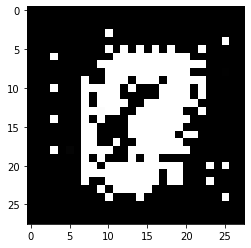

Gen loss: 0.006147890002466738  -  Disc loss: 2.5522551176836714


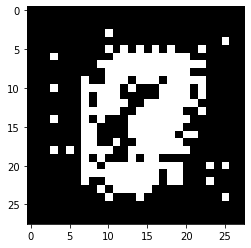

Gen loss: 0.006165983504615724  -  Disc loss: 2.550572809064761


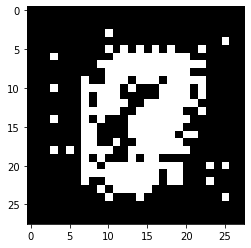

Gen loss: 0.006259375950321555  -  Disc loss: 2.542979973834008


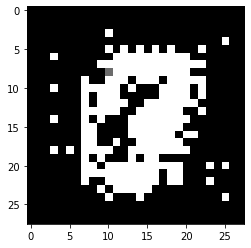

Gen loss: 0.006284992326982319  -  Disc loss: 2.541131589212455


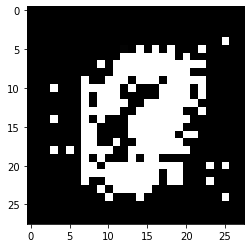

Gen loss: 0.00611993670463562  -  Disc loss: 2.554253187030554


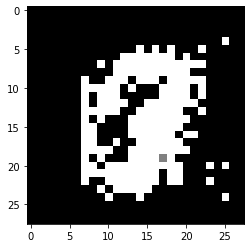

Gen loss: 0.006171470624394715  -  Disc loss: 2.549997217603959


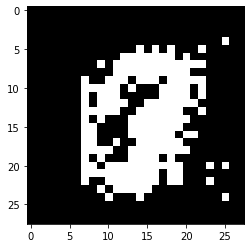

Gen loss: 0.006207193364389241  -  Disc loss: 2.5472909059608355


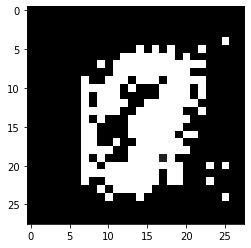

Gen loss: 0.006280981237068772  -  Disc loss: 2.541223271167837


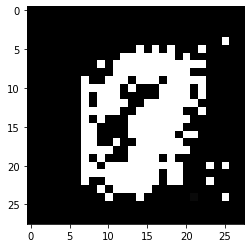

Gen loss: 0.006325421272777021  -  Disc loss: 2.538037100341171


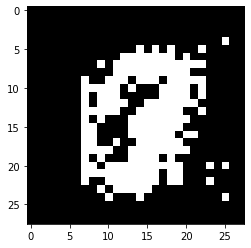

Gen loss: 0.0062174900667741895  -  Disc loss: 2.5462352237664163


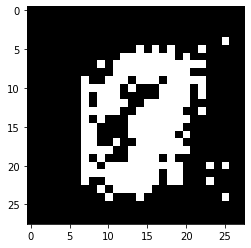

Gen loss: 0.006235652603209019  -  Disc loss: 2.5448010060936213


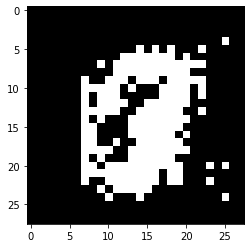

Gen loss: 0.006245750584639609  -  Disc loss: 2.5440254266140983


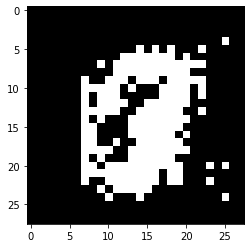

Gen loss: 0.006268181372433901  -  Disc loss: 2.542100638966076


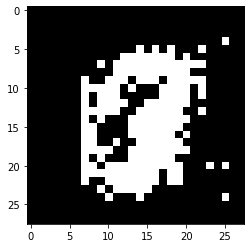

Gen loss: 0.0062197454972192645  -  Disc loss: 2.5462705651298165


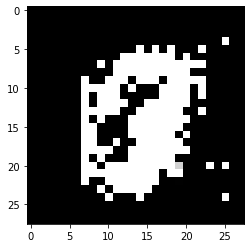

Gen loss: 0.0062626495491713285  -  Disc loss: 2.542588763521053


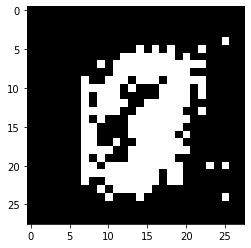

Gen loss: 0.006430507986806333  -  Disc loss: 2.529235174297355


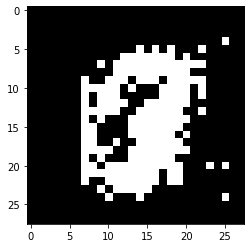

Gen loss: 0.0063193830428645015  -  Disc loss: 2.5381378355668858


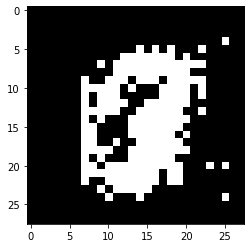

Gen loss: 0.006318956729955971  -  Disc loss: 2.5383336754748598


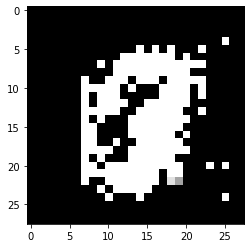

Gen loss: 0.0062719546258449554  -  Disc loss: 2.541612151195295


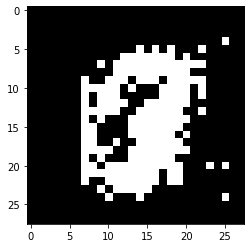

Gen loss: 0.006337147671729326  -  Disc loss: 2.5363442395464517


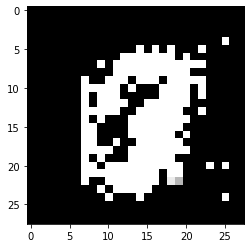

Gen loss: 0.006273068953305483  -  Disc loss: 2.5413247758406214


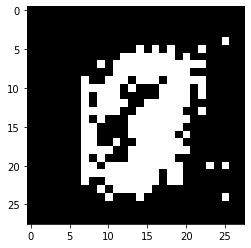

Gen loss: 0.006276116939261556  -  Disc loss: 2.541150782839395


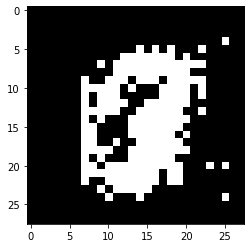

Gen loss: 0.006425954168662429  -  Disc loss: 2.529413674492389


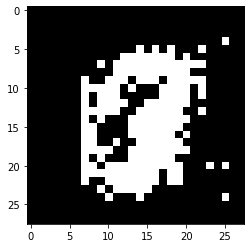

Gen loss: 0.006331788026727736  -  Disc loss: 2.5364870136836544


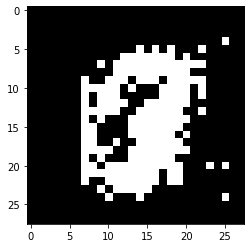

Gen loss: 0.006406710250303149  -  Disc loss: 2.5310772479278967


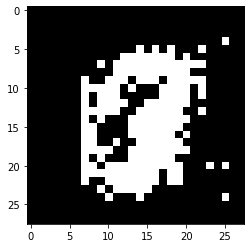

Gen loss: 0.006298957858234644  -  Disc loss: 2.5394203820033


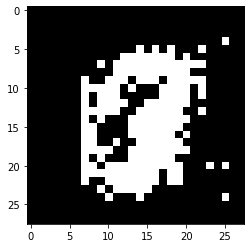

Gen loss: 0.006326742237433791  -  Disc loss: 2.537036436435301


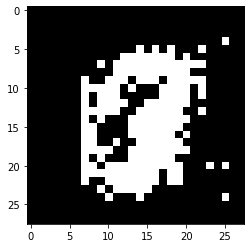

Gen loss: 0.006332364631816745  -  Disc loss: 2.536609016591683


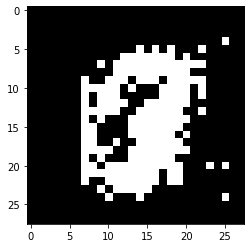

Gen loss: 0.0062375887064263225  -  Disc loss: 2.5443009954178706


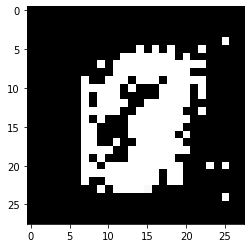

Gen loss: 0.006336588645353913  -  Disc loss: 2.5358983200858347


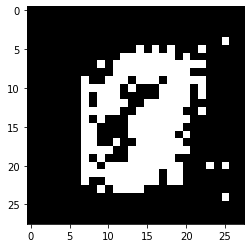

Gen loss: 0.006263180635869503  -  Disc loss: 2.5413061537547037


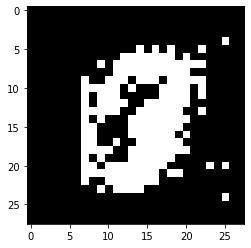

Gen loss: 0.006128528155386448  -  Disc loss: 2.553768265293911


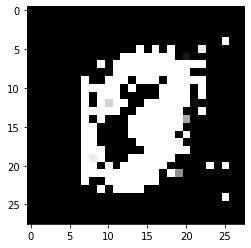

Gen loss: 0.006092674797400832  -  Disc loss: 2.556188410730101


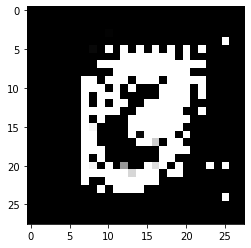

Gen loss: 0.006133946473710239  -  Disc loss: 2.553053878247738


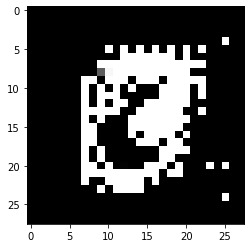

Gen loss: 0.006047504721209407  -  Disc loss: 2.5615117552224547


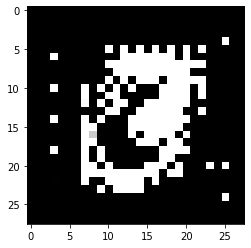

Gen loss: 0.006077870377339423  -  Disc loss: 2.558477595448494


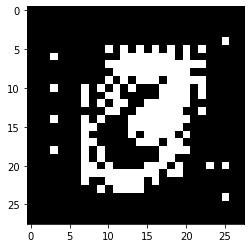

Gen loss: 0.006222919095307589  -  Disc loss: 2.546448153909296


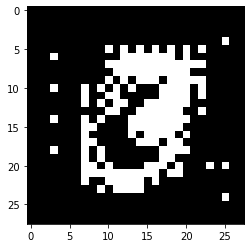

Gen loss: 0.006140350364148617  -  Disc loss: 2.5532253144774586


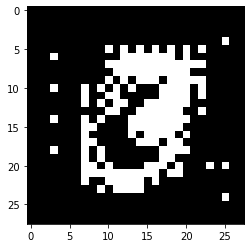

Gen loss: 0.006199812516570091  -  Disc loss: 2.548113869735971


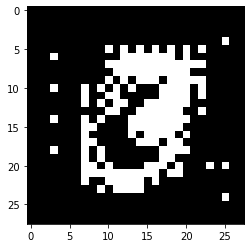

Gen loss: 0.006236248183995485  -  Disc loss: 2.5453951279632747


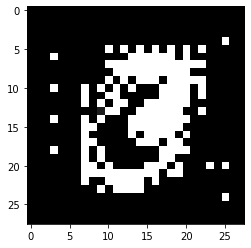

Gen loss: 0.006236477056518197  -  Disc loss: 2.5448785428889096


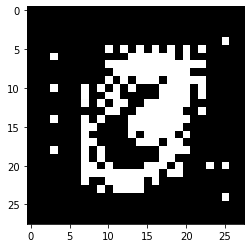

Gen loss: 0.0062142598908394575  -  Disc loss: 2.546574147301726


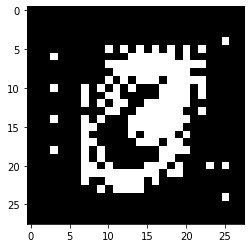

Gen loss: 0.006228454876691103  -  Disc loss: 2.5452919389354065


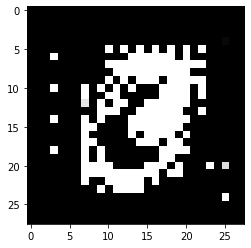

Gen loss: 0.006216251291334629  -  Disc loss: 2.546681199572049


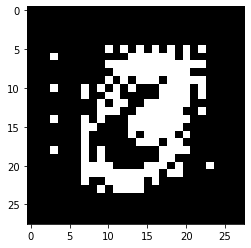

Gen loss: 0.0061633671866729856  -  Disc loss: 2.5507050800370052


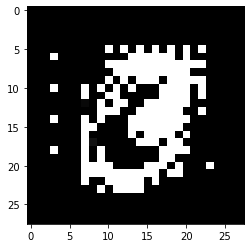

Gen loss: 0.006369990180246532  -  Disc loss: 2.5342463199049234


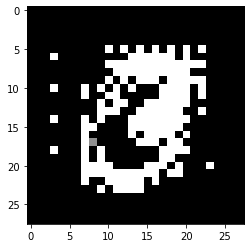

Gen loss: 0.006195807596668601  -  Disc loss: 2.5480185583001003


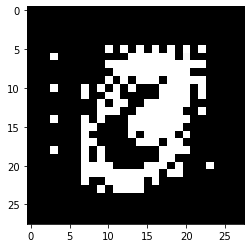

Gen loss: 0.006268897908739746  -  Disc loss: 2.542150527704507


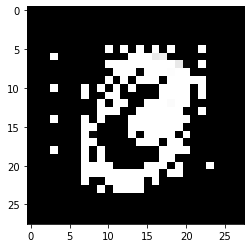

Gen loss: 0.006172475288622081  -  Disc loss: 2.5510901886736974


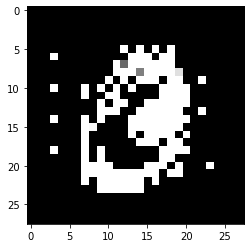

Gen loss: 0.006147413398139179  -  Disc loss: 2.552234979229979


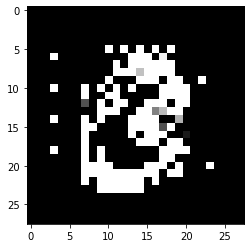

Gen loss: 0.0062296511605381966  -  Disc loss: 2.5463167229900137


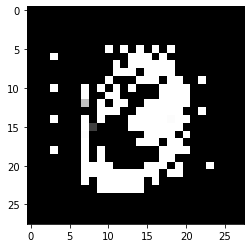

Gen loss: 0.006151597714051604  -  Disc loss: 2.55231393489521


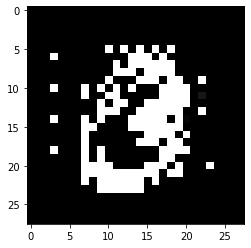

Gen loss: 0.00626846740487963  -  Disc loss: 2.5432706262217835


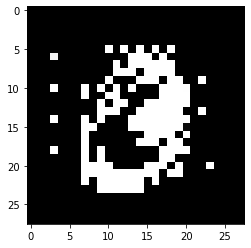

Gen loss: 0.006245724274776876  -  Disc loss: 2.5449567219475284


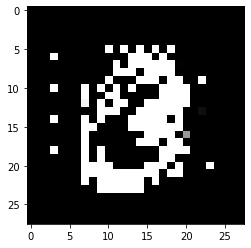

Gen loss: 0.006349747302010655  -  Disc loss: 2.5366728382650763


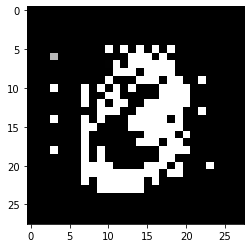

Gen loss: 0.0062613304471597075  -  Disc loss: 2.543359530624002


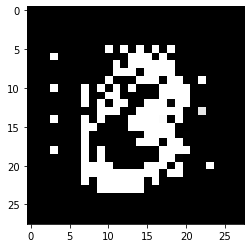

Gen loss: 0.006312980432994664  -  Disc loss: 2.5393714060774073


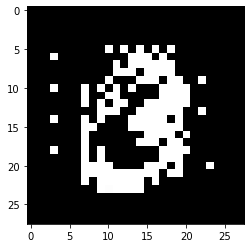

Gen loss: 0.006318230996839702  -  Disc loss: 2.5386149905389175


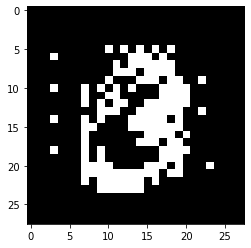

Gen loss: 0.006319821462966502  -  Disc loss: 2.5385446418076754


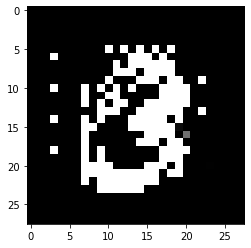

Gen loss: 0.006319307954981923  -  Disc loss: 2.538290725206025


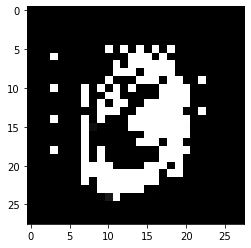

Gen loss: 0.006215456291101873  -  Disc loss: 2.5466778576374054


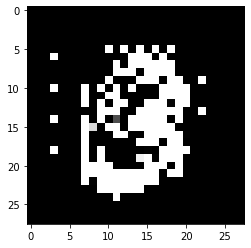

Gen loss: 0.0062311619985848665  -  Disc loss: 2.545325187034905


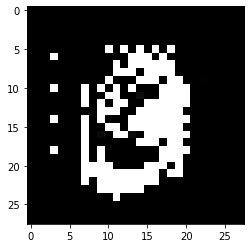

Gen loss: 0.0061311094323173165  -  Disc loss: 2.5531235275557265


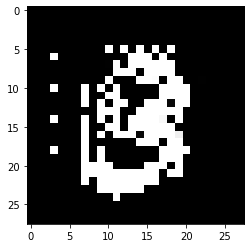

Gen loss: 0.006252779625356197  -  Disc loss: 2.544123518979177


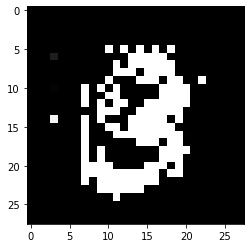

Gen loss: 0.0061051989905536175  -  Disc loss: 2.553785844007507


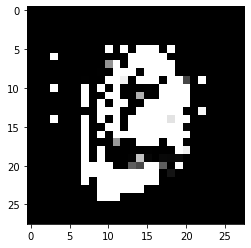

Gen loss: 0.00704560917802155  -  Disc loss: 2.485787170473486


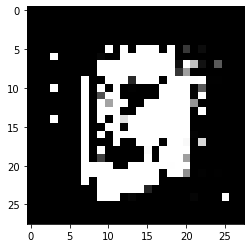

Gen loss: 0.00615521427243948  -  Disc loss: 2.5548446581233293


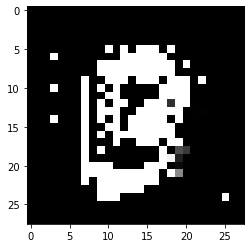

Gen loss: 0.006184222525916994  -  Disc loss: 2.5521576006431133


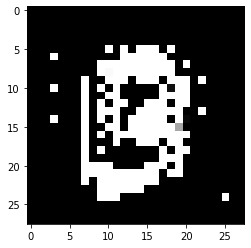

Gen loss: 0.006197827868163586  -  Disc loss: 2.55029477737844


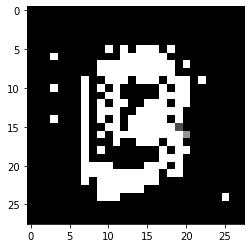

Gen loss: 0.006270658457651734  -  Disc loss: 2.5444516733987257


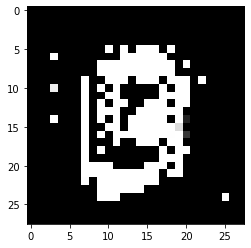

Gen loss: 0.006315641454420984  -  Disc loss: 2.540348441922106


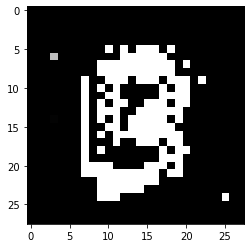

Gen loss: 0.006324881222099066  -  Disc loss: 2.539642715244554


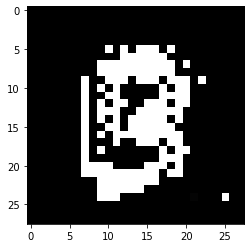

Gen loss: 0.006309991469606757  -  Disc loss: 2.5405045804800466


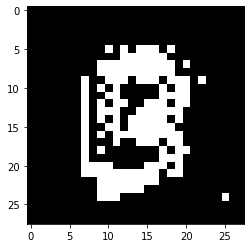

Gen loss: 0.00633548921905458  -  Disc loss: 2.538270358229056


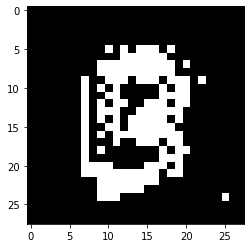

Gen loss: 0.006277696695178747  -  Disc loss: 2.5428562061861157


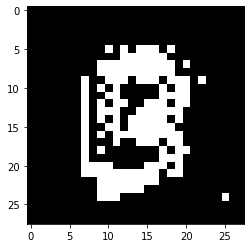

Gen loss: 0.0063255856512114406  -  Disc loss: 2.5389202478108928


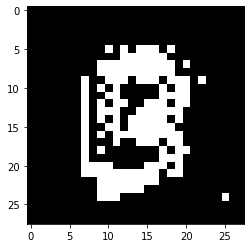

Gen loss: 0.006330567761324346  -  Disc loss: 2.538351886207238


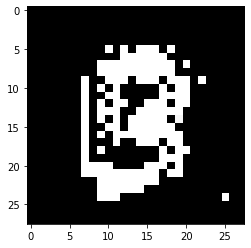

Gen loss: 0.006382595282047987  -  Disc loss: 2.534652499598451


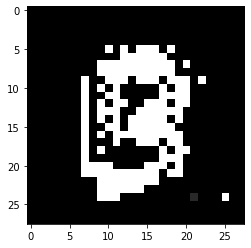

Gen loss: 0.006428640219382942  -  Disc loss: 2.530589848640375


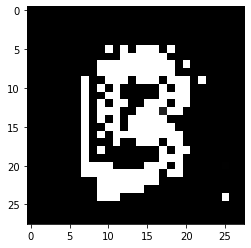

Gen loss: 0.00641497818287462  -  Disc loss: 2.5315784363774583


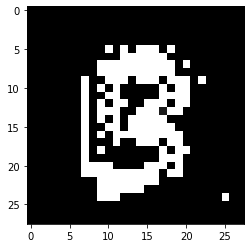

Gen loss: 0.006345277768559754  -  Disc loss: 2.5371220149099827


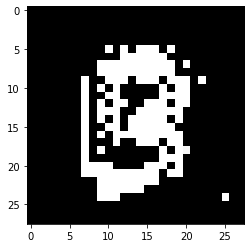

Gen loss: 0.0063339435728266835  -  Disc loss: 2.537718591396697


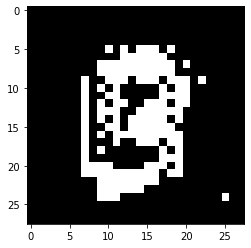

Gen loss: 0.006368049769662321  -  Disc loss: 2.535332315717824


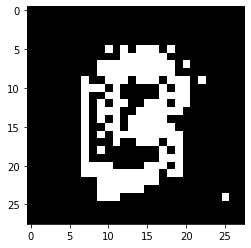

Gen loss: 0.0064132228726521134  -  Disc loss: 2.5314424437237903


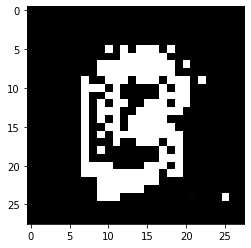

Gen loss: 0.006337124155834317  -  Disc loss: 2.5373661855701357


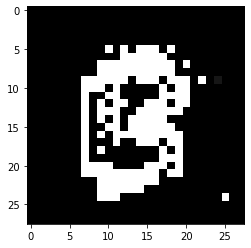

Gen loss: 0.00628538359887898  -  Disc loss: 2.5417637462960556


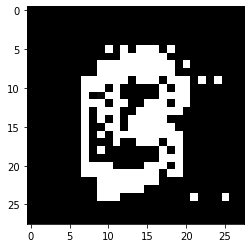

Gen loss: 0.0062034400179982185  -  Disc loss: 2.54700777574908


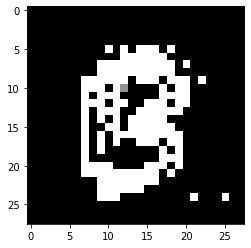

Gen loss: 0.006247318000532687  -  Disc loss: 2.5457307688193396


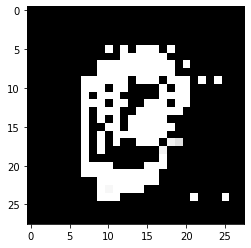

Gen loss: 0.006296056322753429  -  Disc loss: 2.5414749302435666


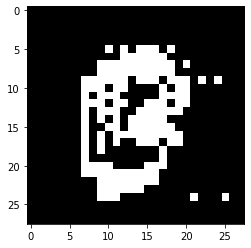

Gen loss: 0.006323316018097103  -  Disc loss: 2.5390254472149536


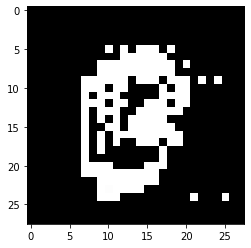

Gen loss: 0.006327271112240851  -  Disc loss: 2.5382075394736603


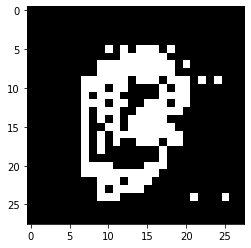

Gen loss: 0.006316186394542456  -  Disc loss: 2.5391605698969215


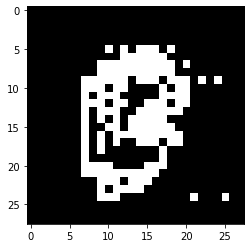

Gen loss: 0.006419894751161337  -  Disc loss: 2.531005453900434


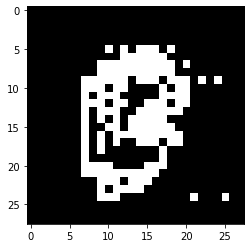

Gen loss: 0.0063273083651438355  -  Disc loss: 2.5381889103446156


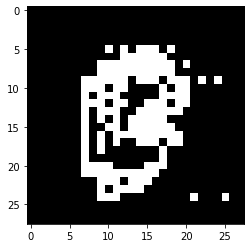

Gen loss: 0.00636492355260998  -  Disc loss: 2.5352440145798028


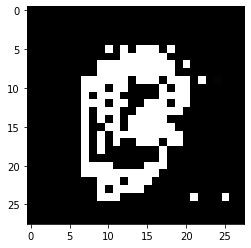

Gen loss: 0.006351987714879215  -  Disc loss: 2.53632762550842


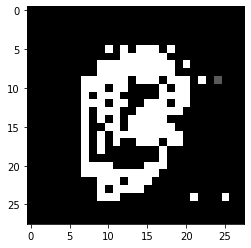

Gen loss: 0.0063677983125671744  -  Disc loss: 2.5343932727118954


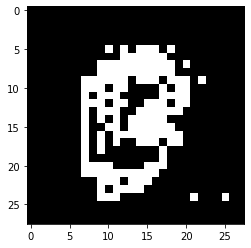

Gen loss: 0.006343605229631066  -  Disc loss: 2.536982335615903


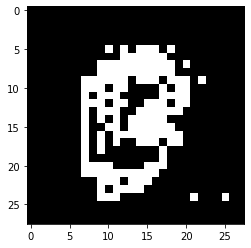

Gen loss: 0.006356188328936696  -  Disc loss: 2.535844558267854


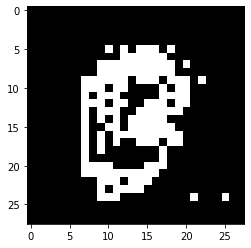

Gen loss: 0.006325637805275619  -  Disc loss: 2.5380322992568836


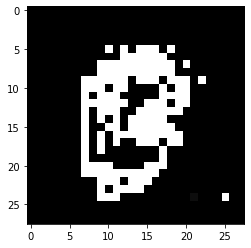

Gen loss: 0.006349361734464765  -  Disc loss: 2.5362925570225343


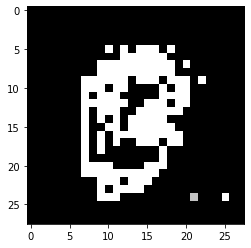

Gen loss: 0.006339900777675211  -  Disc loss: 2.536759367911145


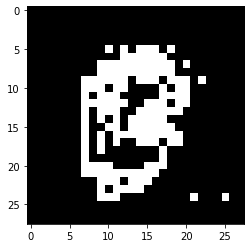

Gen loss: 0.006365364883095026  -  Disc loss: 2.5350103797391057


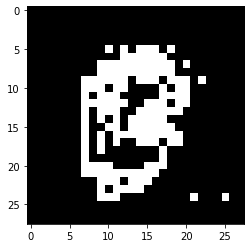

Gen loss: 0.006341870641335845  -  Disc loss: 2.5365152349695563


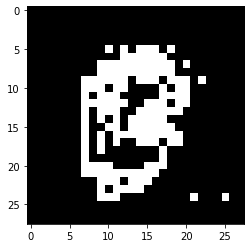

Gen loss: 0.006310639437288046  -  Disc loss: 2.5390034036245197


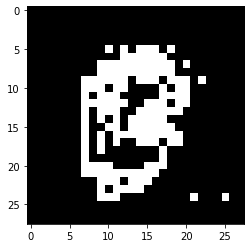

Gen loss: 0.006386471330188215  -  Disc loss: 2.532836142810993


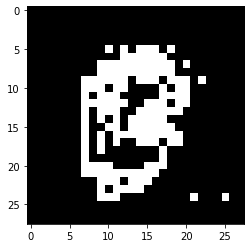

Gen loss: 0.005979300593025982  -  Disc loss: 2.567049316014163


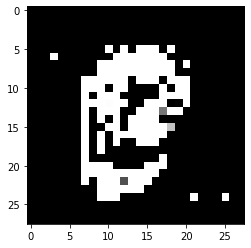

Gen loss: 0.0061223587254062295  -  Disc loss: 2.555192474508658


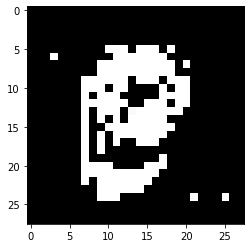

Gen loss: 0.006225832388736308  -  Disc loss: 2.546660670777783


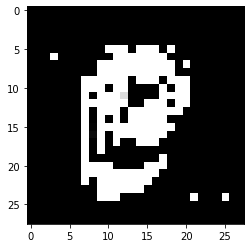

Gen loss: 0.006218578200787306  -  Disc loss: 2.5466050503309816


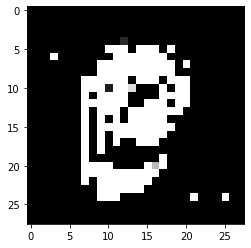

Gen loss: 0.006164241931401193  -  Disc loss: 2.551258241990581


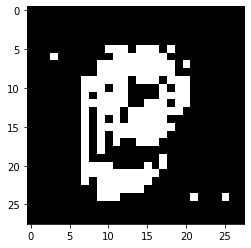

Gen loss: 0.006251047248952091  -  Disc loss: 2.5439523787936196


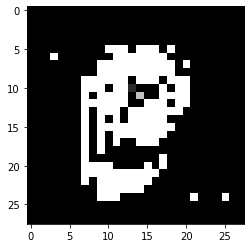

Gen loss: 0.006180128897540271  -  Disc loss: 2.549735810374841


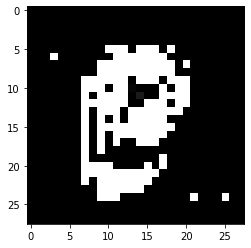

Gen loss: 0.006167849991470575  -  Disc loss: 2.551005918183364


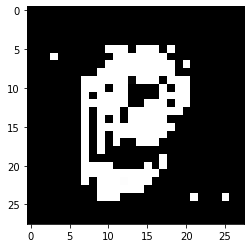

Gen loss: 0.006242620409466326  -  Disc loss: 2.543300899793394


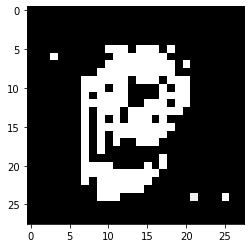

Gen loss: 0.006143180653452873  -  Disc loss: 2.551161039969884


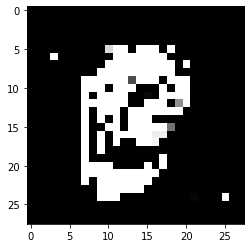

Gen loss: 0.006091471295803785  -  Disc loss: 2.557055357960053


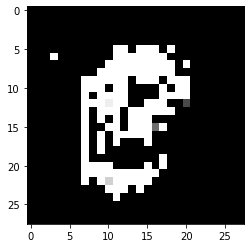

Gen loss: 0.006108663510531187  -  Disc loss: 2.556228182511404


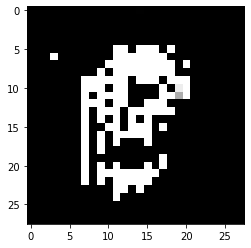

Gen loss: 0.006156208924949169  -  Disc loss: 2.5521965568186715


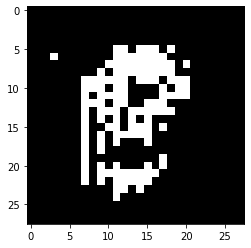

Gen loss: 0.006093367235735059  -  Disc loss: 2.557194451102987


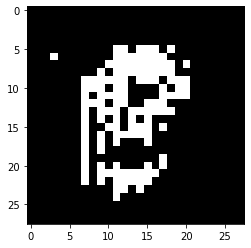

Gen loss: 0.006164486054331064  -  Disc loss: 2.5512996189063415


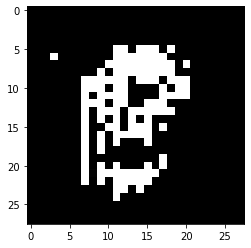

Gen loss: 0.006229425081983209  -  Disc loss: 2.5461788654793054


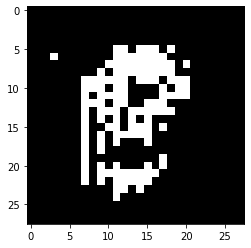

Gen loss: 0.006183480843901634  -  Disc loss: 2.5495907795848325


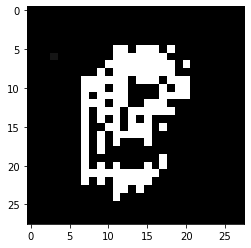

Gen loss: 0.006155402516014874  -  Disc loss: 2.551726474077441


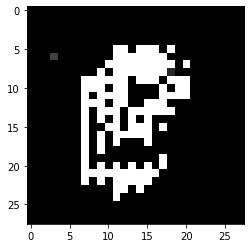

Gen loss: 0.006243476993404329  -  Disc loss: 2.5447596673620865


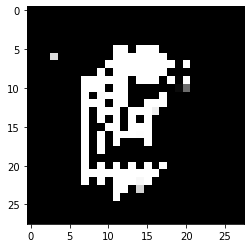

Gen loss: 0.006177903153002262  -  Disc loss: 2.5503117649350315


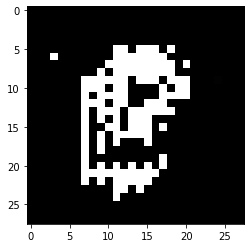

Gen loss: 0.006095392047427595  -  Disc loss: 2.556553059257567


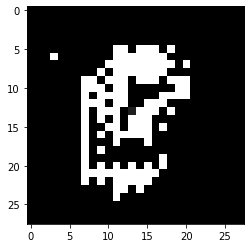

Gen loss: 0.006241776165552437  -  Disc loss: 2.5451279229018837


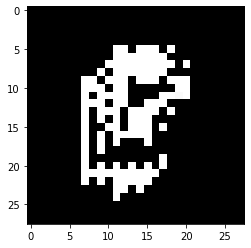

Gen loss: 0.006260059075430036  -  Disc loss: 2.543409666628577


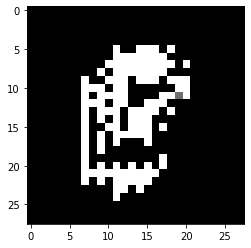

Gen loss: 0.00616040441673249  -  Disc loss: 2.5514423897257075


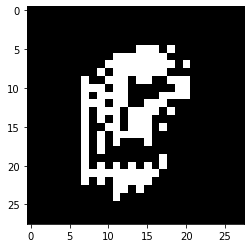

Gen loss: 0.006153319496661425  -  Disc loss: 2.551839087274857


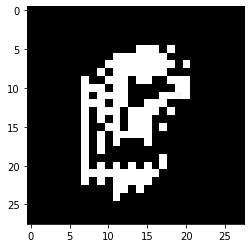

Gen loss: 0.006225223885849118  -  Disc loss: 2.5462735367473215


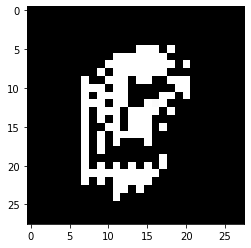

Gen loss: 0.006200846517458558  -  Disc loss: 2.548356571001932


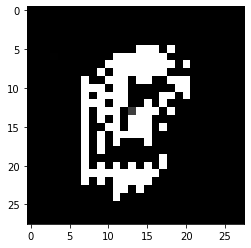

Gen loss: 0.006056162063032389  -  Disc loss: 2.5605386360548437


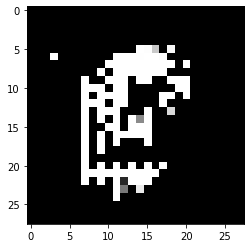

Gen loss: 0.006133146467618644  -  Disc loss: 2.5547948826570064


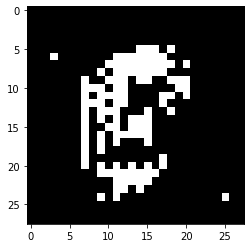

Gen loss: 0.006111924070864916  -  Disc loss: 2.555783318937756


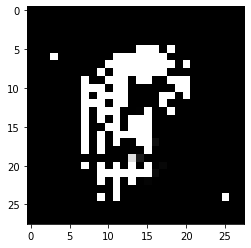

Gen loss: 0.006064341287128627  -  Disc loss: 2.5601729471236467


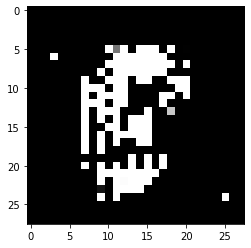

Gen loss: 0.006116840289905667  -  Disc loss: 2.5550202273298055


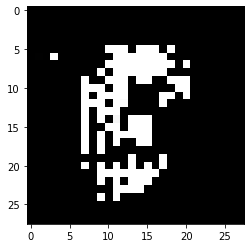

Gen loss: 0.006166811683215201  -  Disc loss: 2.550969877629541


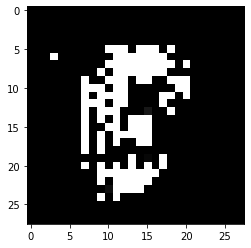

Gen loss: 0.006178038660436869  -  Disc loss: 2.550507152453065


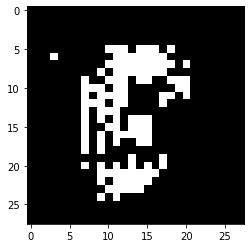

Gen loss: 0.006218992057256401  -  Disc loss: 2.547037383308634


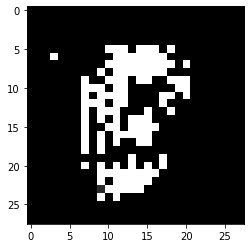

Gen loss: 0.0061681384686380625  -  Disc loss: 2.5503146414412186


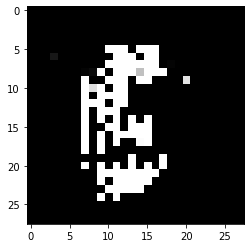

Gen loss: 0.006188487866893411  -  Disc loss: 2.549274191027507


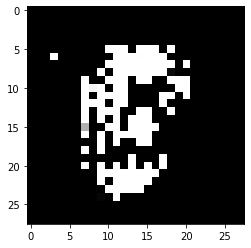

Gen loss: 0.006203184369951487  -  Disc loss: 2.5479208931792527


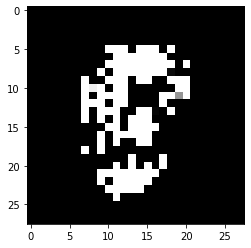

Gen loss: 0.006188120925799012  -  Disc loss: 2.5480845688143745


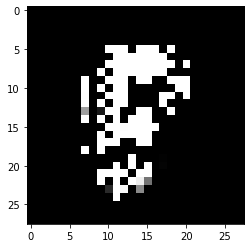

Gen loss: 0.00619969645049423  -  Disc loss: 2.549890114576556


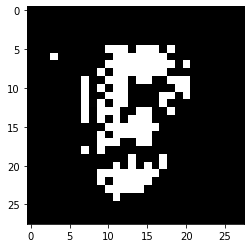

Gen loss: 0.006241555791348219  -  Disc loss: 2.5459705721586943


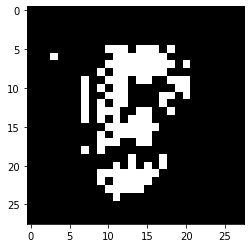

Gen loss: 0.006143522681668401  -  Disc loss: 2.5527507700026035


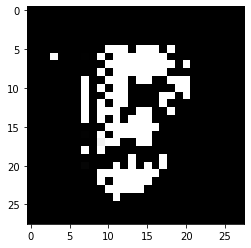

Gen loss: 0.00624131434597075  -  Disc loss: 2.5460458730813116


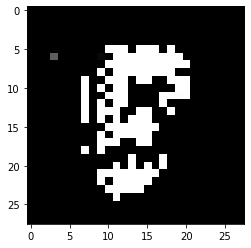

Gen loss: 0.006180487456731498  -  Disc loss: 2.550378846586682


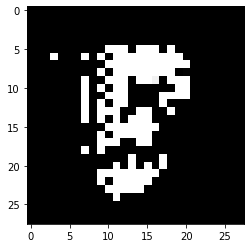

Gen loss: 0.006075367098674178  -  Disc loss: 2.557515738415532


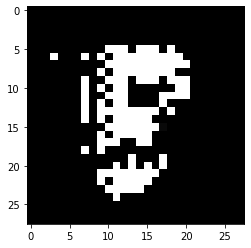

Gen loss: 0.006129174958914518  -  Disc loss: 2.5581198644358665


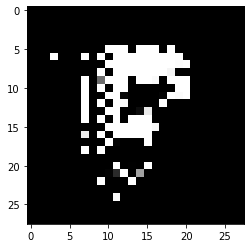

Gen loss: 0.006067070295102894  -  Disc loss: 2.5599438744829968


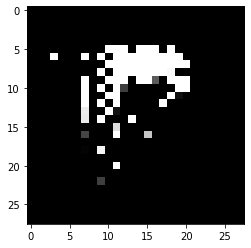

Gen loss: 0.006189974024891853  -  Disc loss: 2.5498907475266606


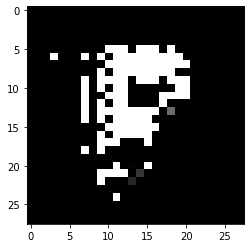

Gen loss: 0.006214870372787118  -  Disc loss: 2.5481491438113153


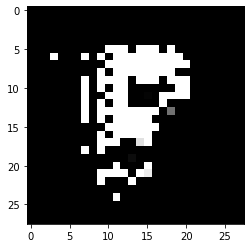

Gen loss: 0.006150983972474933  -  Disc loss: 2.5516792259877548


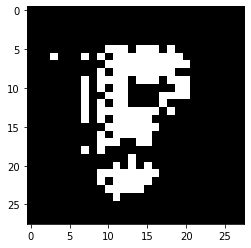

Gen loss: 0.006064089480787516  -  Disc loss: 2.5590030963066965


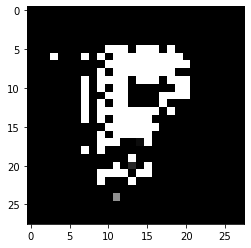

Gen loss: 0.006110851769335568  -  Disc loss: 2.5554161955369636


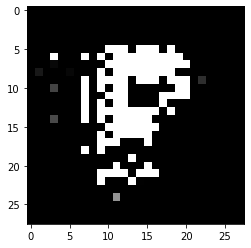

Gen loss: 0.006126224179752171  -  Disc loss: 2.553745913784951


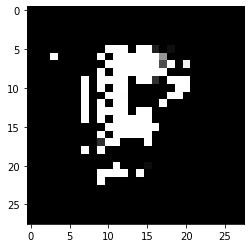

Gen loss: 0.006093733594752848  -  Disc loss: 2.5565575879300013


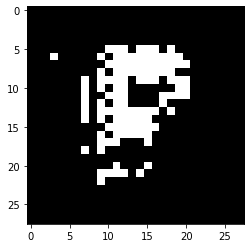

Gen loss: 0.006072005606256425  -  Disc loss: 2.558810308459215


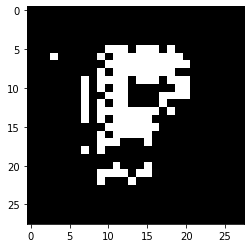

Gen loss: 0.006123554427176714  -  Disc loss: 2.5545483794994652


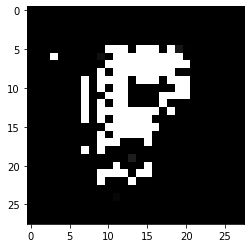

Gen loss: 0.006135729956440628  -  Disc loss: 2.5526026530424133


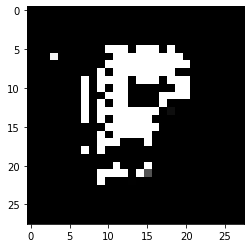

Gen loss: 0.006111886235885322  -  Disc loss: 2.555288925766945


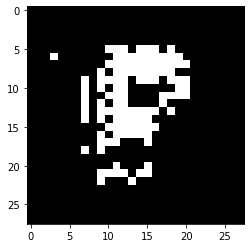

Gen loss: 0.006090200389735401  -  Disc loss: 2.55709017731715


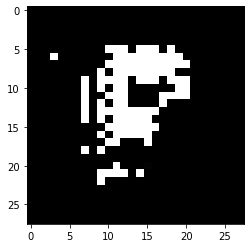

Gen loss: 0.006147096981294453  -  Disc loss: 2.552403182722628


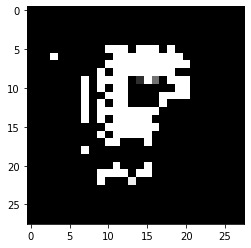

Gen loss: 0.006130053428933024  -  Disc loss: 2.5536916515557095


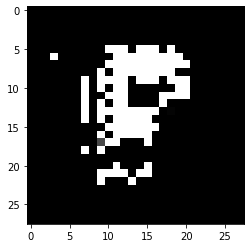

Gen loss: 0.00613649794831872  -  Disc loss: 2.5529649284435436


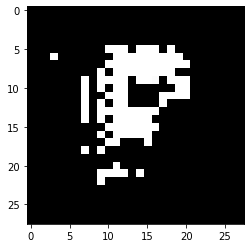

Gen loss: 0.006158742588013411  -  Disc loss: 2.551101148012094


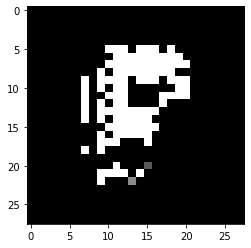

Gen loss: 0.006076111574657261  -  Disc loss: 2.5579754163045436


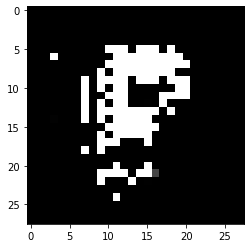

Gen loss: 0.0061203764053061604  -  Disc loss: 2.55466009338852


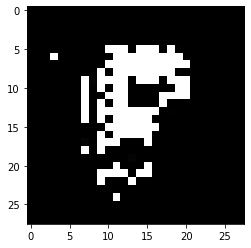

Gen loss: 0.006125983200035989  -  Disc loss: 2.5545665816171095


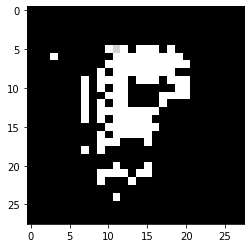

Gen loss: 0.006135811912827194  -  Disc loss: 2.55291098554153


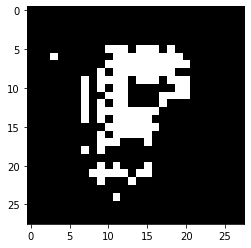

Gen loss: 0.006106742890551686  -  Disc loss: 2.555627260473557


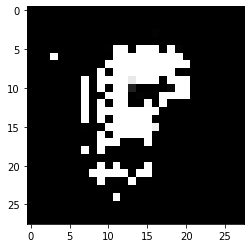

Gen loss: 0.006207264610566199  -  Disc loss: 2.5485663017025217


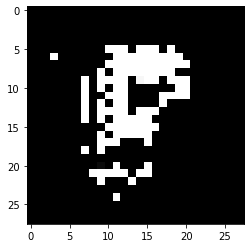

Gen loss: 0.006141678197309375  -  Disc loss: 2.552889263839461


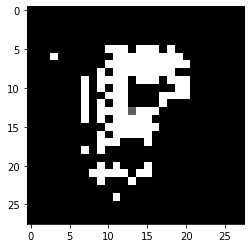

Gen loss: 0.006108003901317716  -  Disc loss: 2.5540166968712583


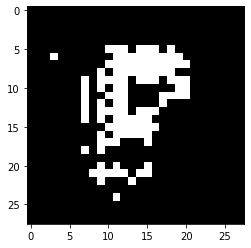

Gen loss: 0.006128803128376603  -  Disc loss: 2.5534684436861426


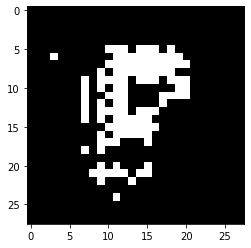

Gen loss: 0.006210625288076699  -  Disc loss: 2.5471074518281966


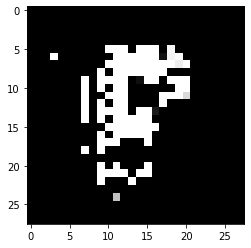

Gen loss: 0.006111583206802607  -  Disc loss: 2.554035378503613


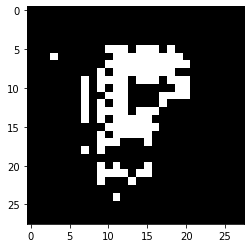

Gen loss: 0.006198914255946875  -  Disc loss: 2.5476553534390405


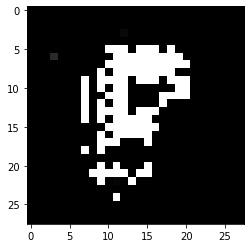

Gen loss: 0.006169343250803649  -  Disc loss: 2.5502010313794017


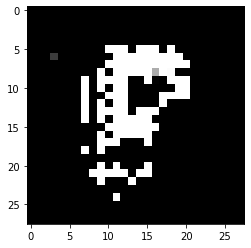

Gen loss: 0.006032613222487271  -  Disc loss: 2.561786196078174


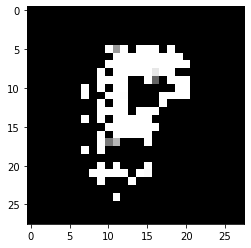

Gen loss: 0.006119283149018884  -  Disc loss: 2.553938655531965


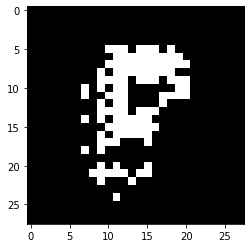

Gen loss: 0.006138120195828378  -  Disc loss: 2.5556064553093165


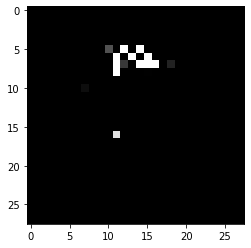

Gen loss: 0.006078196573071182  -  Disc loss: 2.5572653638664633


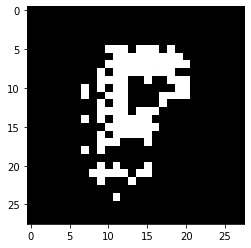

Gen loss: 0.006178225390613079  -  Disc loss: 2.5486020201351494


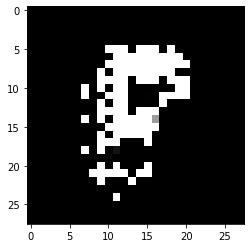

Gen loss: 0.006092364201322198  -  Disc loss: 2.5569651992991567


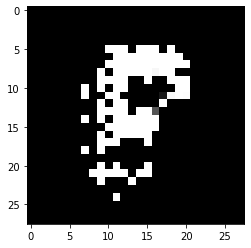

Gen loss: 0.0061054612742736936  -  Disc loss: 2.555104474769905


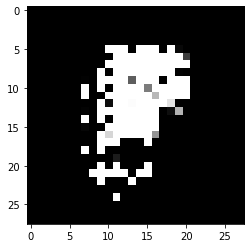

Gen loss: 0.006124727660790086  -  Disc loss: 2.551636896794662


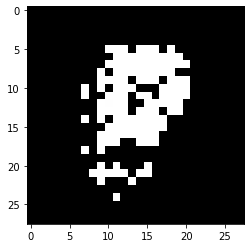

Gen loss: 0.006107716704718769  -  Disc loss: 2.5547033904585987


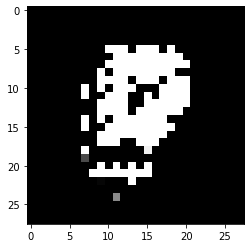

Gen loss: 0.006061654887162149  -  Disc loss: 2.5589043386280537


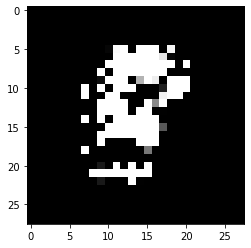

Gen loss: 0.00609297608025372  -  Disc loss: 2.556883189245127


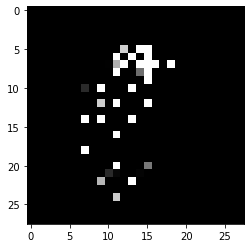

Gen loss: 0.00613969296682626  -  Disc loss: 2.553385537932627


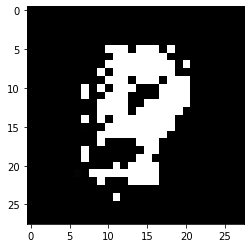

Gen loss: 0.006126567488536239  -  Disc loss: 2.554421206819825


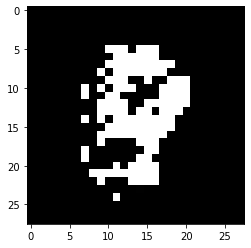

Gen loss: 0.0061684068059548736  -  Disc loss: 2.549410083447583


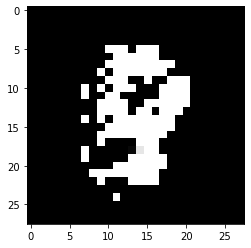

Gen loss: 0.0061660329811275005  -  Disc loss: 2.545812023570761


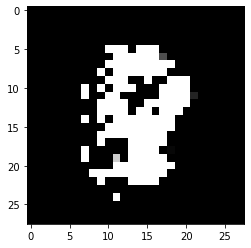

Gen loss: 0.006167744402773678  -  Disc loss: 2.5503431654069573


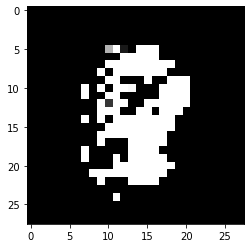

Gen loss: 0.005993512342683971  -  Disc loss: 2.563839378999546


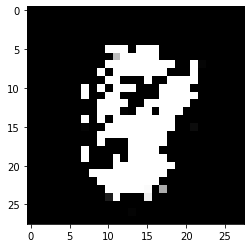

Gen loss: 0.006047898903489113  -  Disc loss: 2.56142589985393


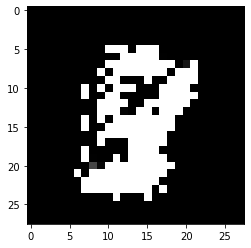

Gen loss: 0.006159781012684107  -  Disc loss: 2.552469117450528


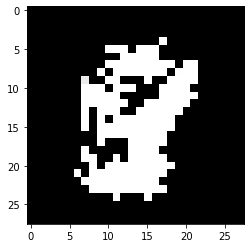

Gen loss: 0.006035236408933997  -  Disc loss: 2.5621322963852435


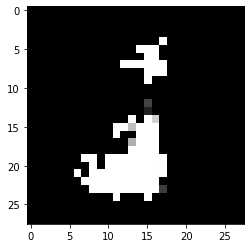

Gen loss: 0.005898600211367011  -  Disc loss: 2.573513063136488


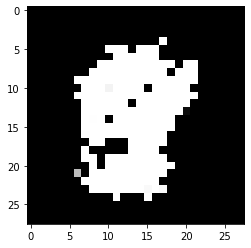

Gen loss: 0.005802924511954188  -  Disc loss: 2.5790742236422375


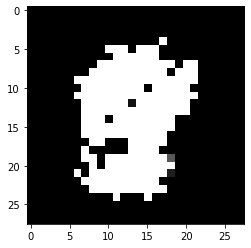

Gen loss: 0.005894022295251489  -  Disc loss: 2.575254133553244


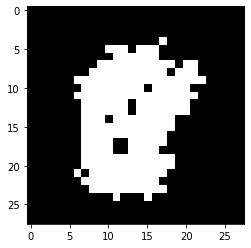

Gen loss: 0.006038335617631674  -  Disc loss: 2.562419379479252


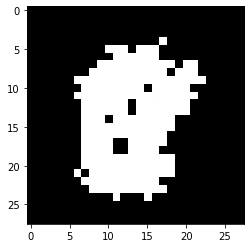

Gen loss: 0.006040954613126814  -  Disc loss: 2.5677321029361337


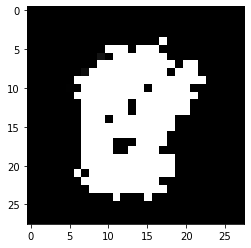

Gen loss: 0.006035078200511634  -  Disc loss: 2.562041998608038


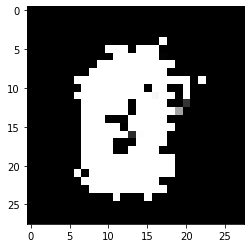

Gen loss: 0.006039879284799099  -  Disc loss: 2.5604430093662813


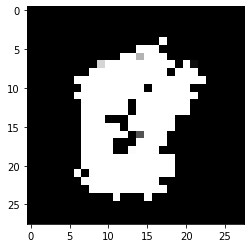

Gen loss: 0.006089186994358897  -  Disc loss: 2.5566515157697722


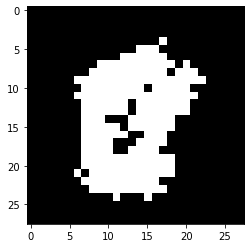

Gen loss: 0.006087466375902295  -  Disc loss: 2.5566895104711875


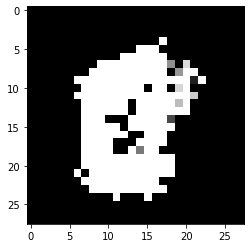

Gen loss: 0.00604402064345777  -  Disc loss: 2.5592721845023334


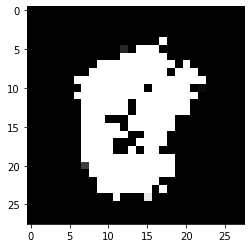

Gen loss: 0.006009400589391589  -  Disc loss: 2.558419798617251


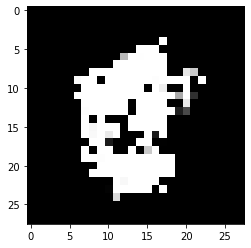

Gen loss: 0.006216191686689854  -  Disc loss: 2.5481112906709313


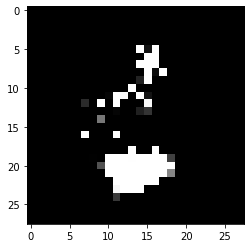

Gen loss: 0.006114127696491778  -  Disc loss: 2.556172886863351


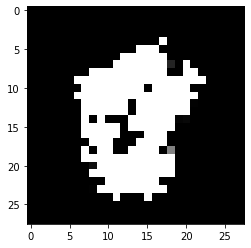

Gen loss: 0.006010783603414893  -  Disc loss: 2.564739107969217


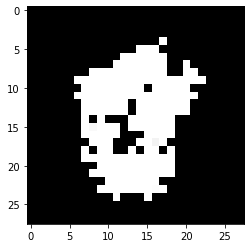

Gen loss: 0.006085946341045201  -  Disc loss: 2.558619218529202


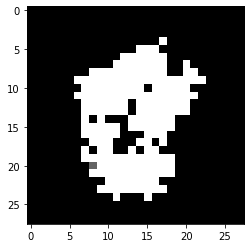

Gen loss: 0.006148749380372465  -  Disc loss: 2.553025475819595


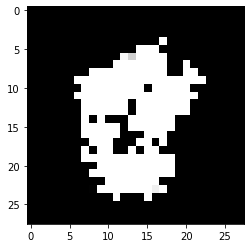

Gen loss: 0.006096935365349054  -  Disc loss: 2.5565285368356854


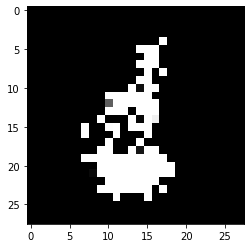

Gen loss: 0.00604183308314532  -  Disc loss: 2.5586034416919574


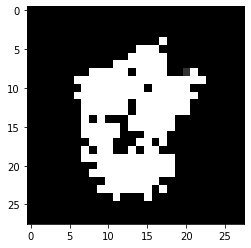

Gen loss: 0.006111544789746404  -  Disc loss: 2.555460250703618


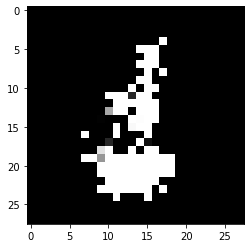

Gen loss: 0.006086065084673464  -  Disc loss: 2.559726727195084


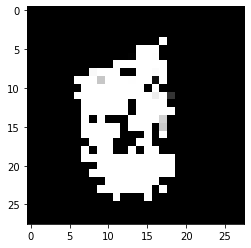

Gen loss: 0.006135733565315604  -  Disc loss: 2.5521741155534983


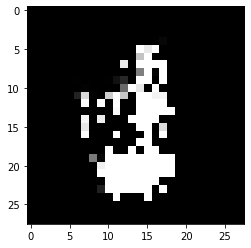

Gen loss: 0.006138529744930565  -  Disc loss: 2.556192485266365


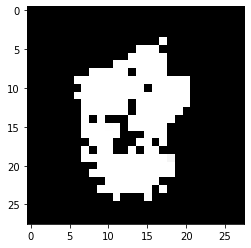

Gen loss: 0.0061504695331677794  -  Disc loss: 2.5538315292214975


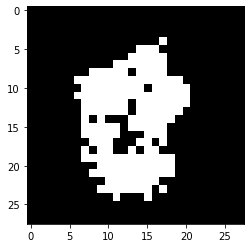

Gen loss: 0.006161823868751526  -  Disc loss: 2.5508330514421687


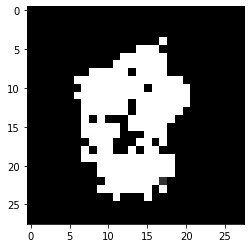

Gen loss: 0.00616778340190649  -  Disc loss: 2.5499029755592346


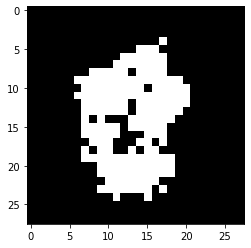

Gen loss: 0.006122472928836942  -  Disc loss: 2.554144169553183


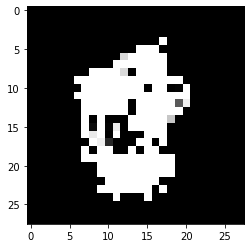

Gen loss: 0.006120615405961871  -  Disc loss: 2.554770049871877


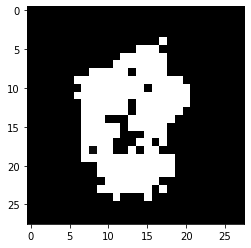

Gen loss: 0.006209951359778643  -  Disc loss: 2.549640031065792


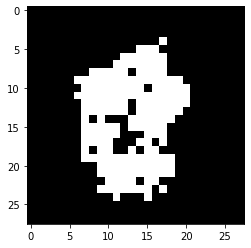

Gen loss: 0.0061933547258377075  -  Disc loss: 2.5477826754795387


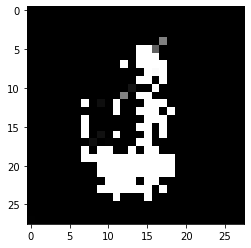

Gen loss: 0.006141035933978856  -  Disc loss: 2.551706245052628


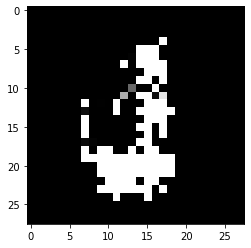

Gen loss: 0.006039772531948984  -  Disc loss: 2.5630026139551774


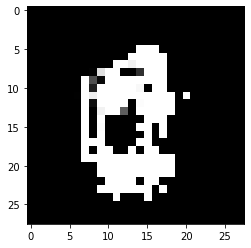

Gen loss: 0.006101571721956134  -  Disc loss: 2.5554329791339114


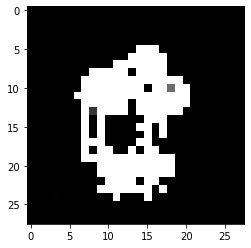

Gen loss: 0.006051382981240749  -  Disc loss: 2.5613398398272693


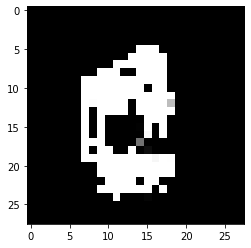

Gen loss: 0.006096401484683156  -  Disc loss: 2.557397256256081


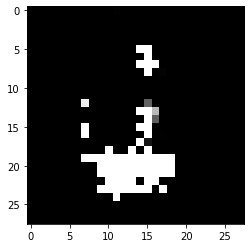

Gen loss: 0.006070330506190658  -  Disc loss: 2.560361144132912


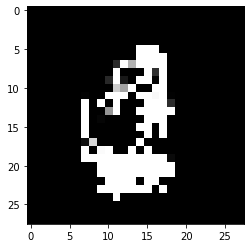

Gen loss: 0.0061382572166621685  -  Disc loss: 2.5546617237851024


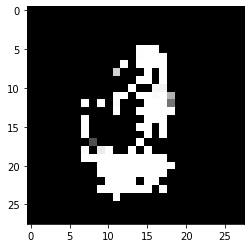

Gen loss: 0.0061507439240813255  -  Disc loss: 2.553659152938053


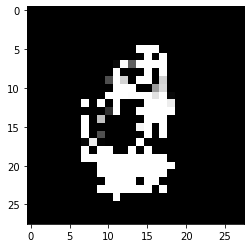

Gen loss: 0.006089607370086014  -  Disc loss: 2.5571970695164055


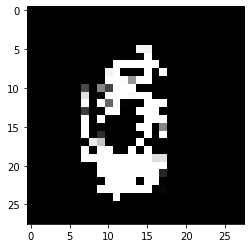

Gen loss: 0.0060249315574765205  -  Disc loss: 2.562778070103377


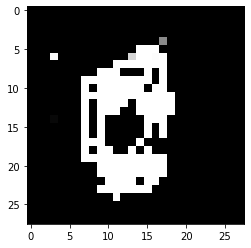

Gen loss: 0.006100203492678702  -  Disc loss: 2.555978360120207


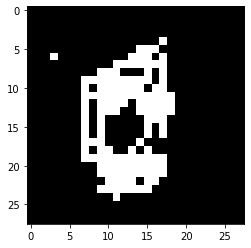

Gen loss: 0.006167758256196976  -  Disc loss: 2.5511450574267656


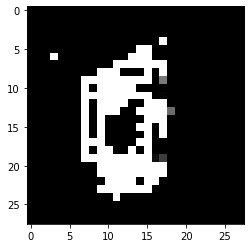

Gen loss: 0.006138707394711673  -  Disc loss: 2.5518368827179074


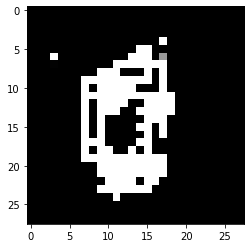

Gen loss: 0.0060957379173487425  -  Disc loss: 2.5566627481020987


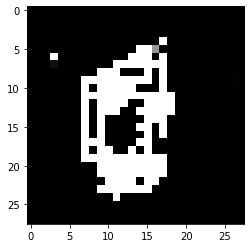

Gen loss: 0.0061776540242135525  -  Disc loss: 2.54963235266041


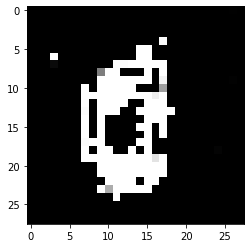

Gen loss: 0.005955156986601651  -  Disc loss: 2.5687355956761166


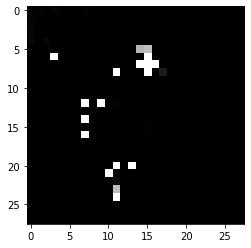

Gen loss: 0.005974724772386253  -  Disc loss: 2.567312951432541


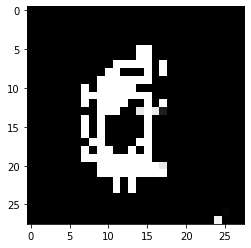

Gen loss: 0.0060037428047508  -  Disc loss: 2.565359562053345


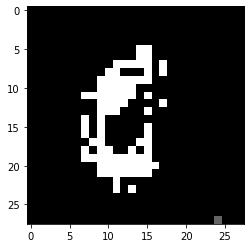

Gen loss: 0.005883747013285756  -  Disc loss: 2.5745221649995074


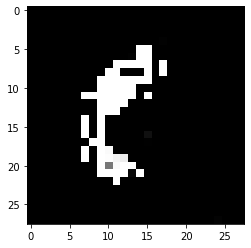

Gen loss: 0.005923442426137626  -  Disc loss: 2.5717926375800744


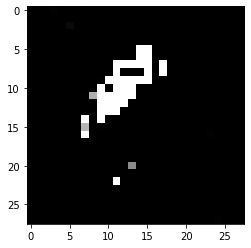

Gen loss: 0.005853983107954264  -  Disc loss: 2.5767203534487635


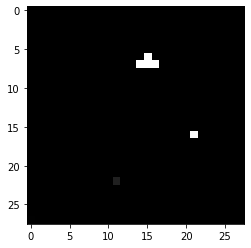

Gen loss: 0.005975662264972925  -  Disc loss: 2.5669296785490587


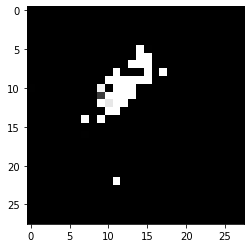

Gen loss: 0.005940080154687166  -  Disc loss: 2.570211940910667


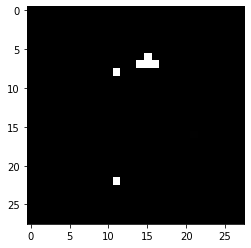

Gen loss: 0.005946626304648817  -  Disc loss: 2.568673201254569


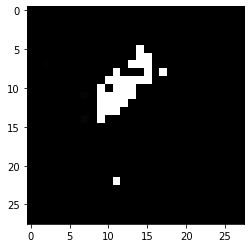

Gen loss: 0.005982213653624058  -  Disc loss: 2.565749020781368


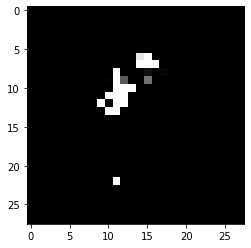

Gen loss: 0.005958758643828332  -  Disc loss: 2.568035693722777


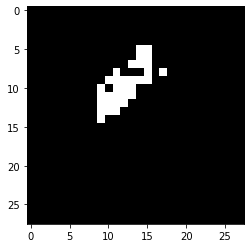

Gen loss: 0.005989344324916601  -  Disc loss: 2.5653962519718334


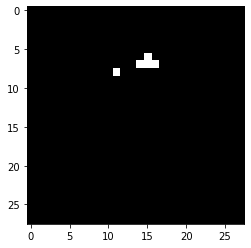

Gen loss: 0.005974284140393138  -  Disc loss: 2.566724346135743


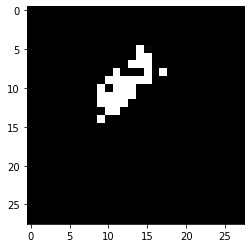

Gen loss: 0.0060145274037495255  -  Disc loss: 2.5630950182676315


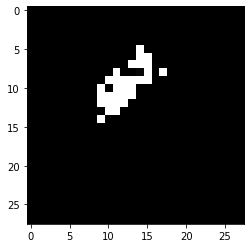

Gen loss: 0.00602686230558902  -  Disc loss: 2.5618567150086164


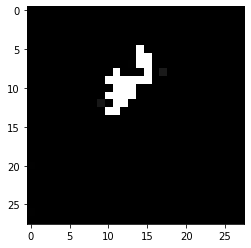

Gen loss: 0.005962567985989153  -  Disc loss: 2.5669704657047987


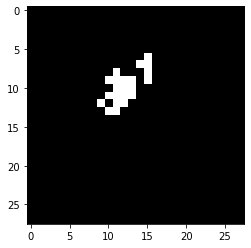

Gen loss: 0.006074929260648787  -  Disc loss: 2.557567054172978


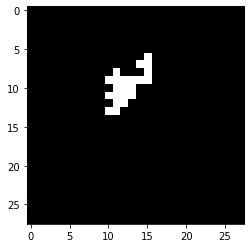

Gen loss: 0.006084037944674492  -  Disc loss: 2.5568994970526546


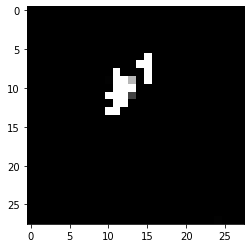

Gen loss: 0.006045222748070955  -  Disc loss: 2.55992601509206


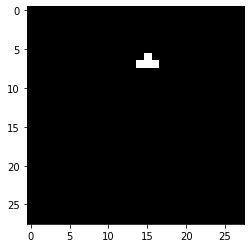

Gen loss: 0.006032130331732333  -  Disc loss: 2.561510477680713


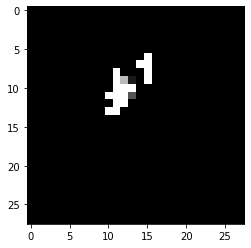

Gen loss: 0.006043252651579678  -  Disc loss: 2.5598610239103436


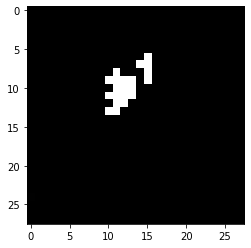

Gen loss: 0.006051614414900541  -  Disc loss: 2.5593916927464306


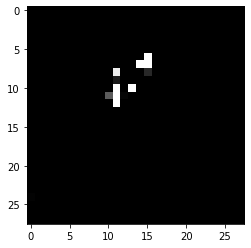

Gen loss: 0.006046216236427426  -  Disc loss: 2.5596633582608774


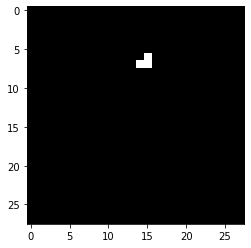

Gen loss: 0.005974518018774688  -  Disc loss: 2.565239594085142


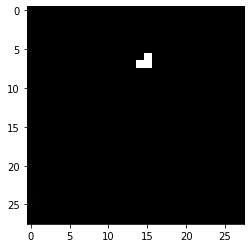

Gen loss: 0.005996651714667678  -  Disc loss: 2.5635417563607916


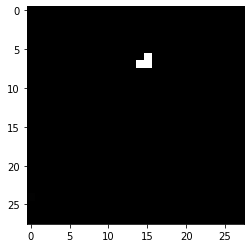

Gen loss: 0.006054642959497869  -  Disc loss: 2.558587369741872


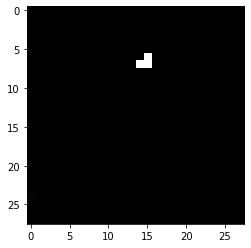

Gen loss: 0.005999574437737465  -  Disc loss: 2.5631030935328454


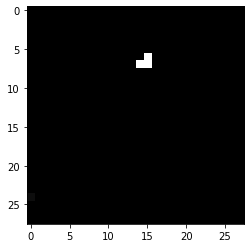

Gen loss: 0.006054817931726575  -  Disc loss: 2.5585449431673624


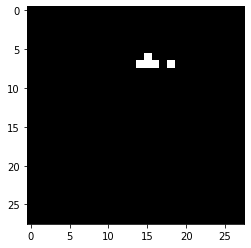

Gen loss: 0.005994122941046953  -  Disc loss: 2.563255434157327


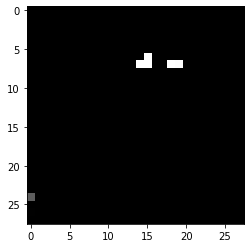

Gen loss: 0.006024773581884801  -  Disc loss: 2.5604391792439856


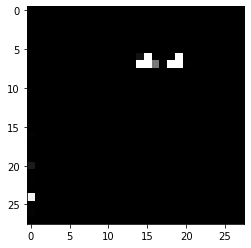

Gen loss: 0.005749203264713287  -  Disc loss: 2.5858049009693787


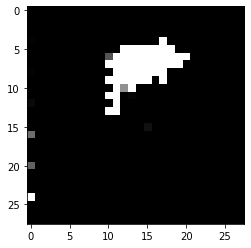

Gen loss: 0.005871000234037638  -  Disc loss: 2.5742273775395006


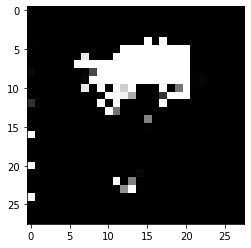

Gen loss: 0.005970051046460867  -  Disc loss: 2.564879742451012


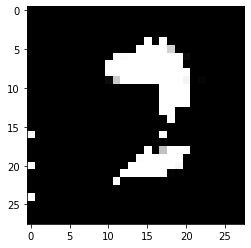

Gen loss: 0.006067844806239009  -  Disc loss: 2.558972553582862


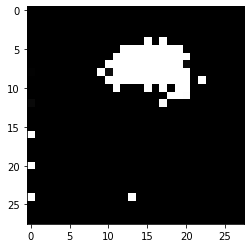

Gen loss: 0.006053163786418736  -  Disc loss: 2.5594837786629796


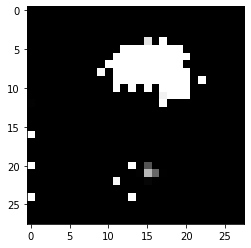

Gen loss: 0.006034005782566965  -  Disc loss: 2.561034256592393


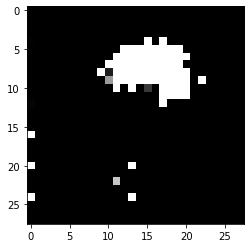

Gen loss: 0.006099282414652407  -  Disc loss: 2.5562258787686005


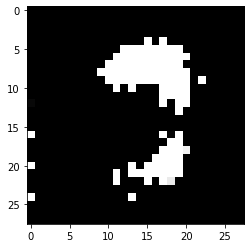

Gen loss: 0.006078652571886778  -  Disc loss: 2.5584241966716945


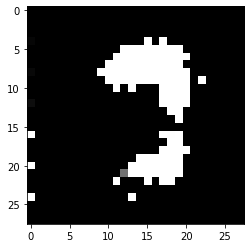

Gen loss: 0.006092633469961584  -  Disc loss: 2.5571394788566977


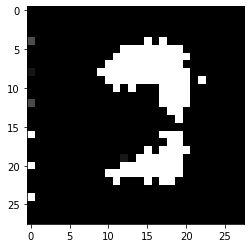

Gen loss: 0.006142273545265198  -  Disc loss: 2.5537995155900717


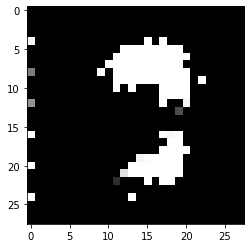

Gen loss: 0.006028927746228874  -  Disc loss: 2.5616626067785546


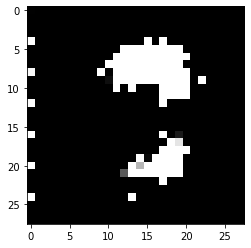

Gen loss: 0.006060310057364404  -  Disc loss: 2.558658238267526


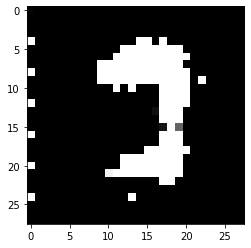

Gen loss: 0.006104650674387813  -  Disc loss: 2.5566832293989137


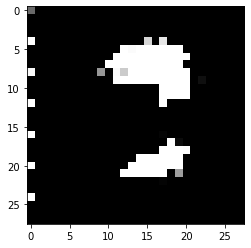

Gen loss: 0.0061551835387945175  -  Disc loss: 2.5520732599543408


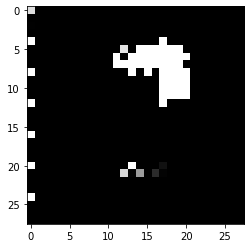

Gen loss: 0.00611602165736258  -  Disc loss: 2.5541354441083968


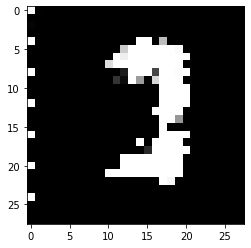

Gen loss: 0.006111352820880711  -  Disc loss: 2.55338910210412


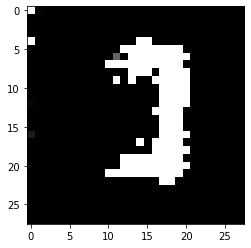

Gen loss: 0.006122885504737496  -  Disc loss: 2.55357906781137


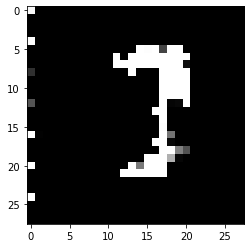

Gen loss: 0.00602874462492764  -  Disc loss: 2.5618587220087647


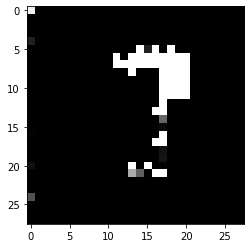

Gen loss: 0.005998193519189954  -  Disc loss: 2.565376868005842


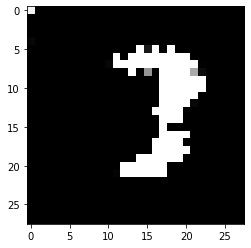

Gen loss: 0.006109701003879309  -  Disc loss: 2.5556099062087014


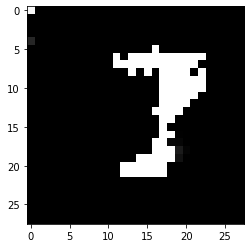

Gen loss: 0.006046821712516248  -  Disc loss: 2.5609478135593235


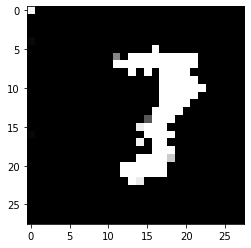

Gen loss: 0.006062641507014632  -  Disc loss: 2.560563786653802


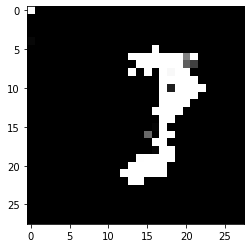

Gen loss: 0.006007125717587769  -  Disc loss: 2.564325792598538


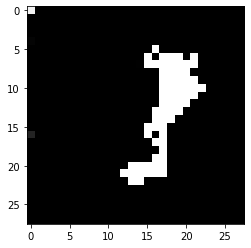

Gen loss: 0.005950145190581679  -  Disc loss: 2.5687870105030015


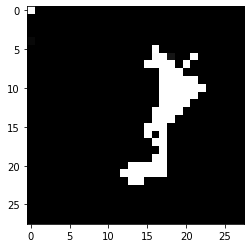

Gen loss: 0.006060962448827922  -  Disc loss: 2.559807073441334


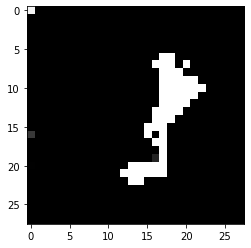

Gen loss: 0.006037526065483689  -  Disc loss: 2.561480645905249


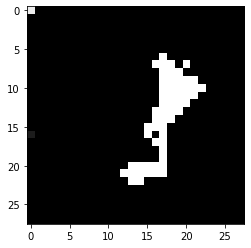

Gen loss: 0.006104820757173002  -  Disc loss: 2.5560646071098745


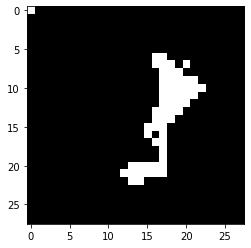

Gen loss: 0.006087517365813255  -  Disc loss: 2.557261706562713


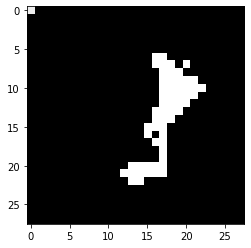

Gen loss: 0.006063209380954504  -  Disc loss: 2.5592846162617207


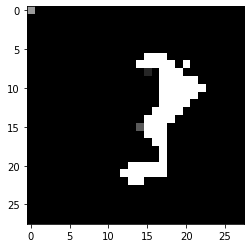

Gen loss: 0.006111080292612314  -  Disc loss: 2.5552357976557687


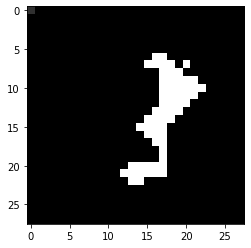

Gen loss: 0.006116351927630603  -  Disc loss: 2.554637557012029


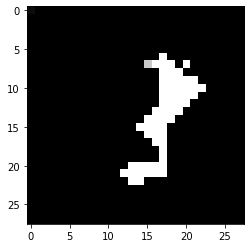

Gen loss: 0.006067583919502795  -  Disc loss: 2.558972217491828


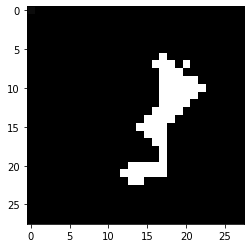

Gen loss: 0.006141914171166718  -  Disc loss: 2.5524915501009673


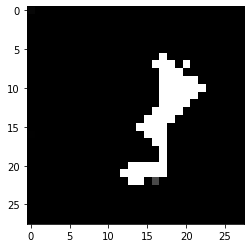

Gen loss: 0.006011576624587178  -  Disc loss: 2.56302416336257


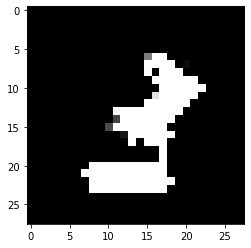

Gen loss: 0.006018371670506895  -  Disc loss: 2.5633732705609873


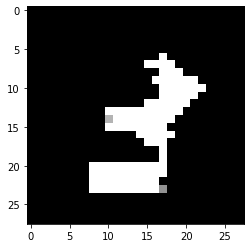

Gen loss: 0.006149924942292273  -  Disc loss: 2.5533571786945686


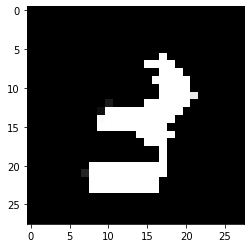

Gen loss: 0.006177443312481046  -  Disc loss: 2.550675859558396


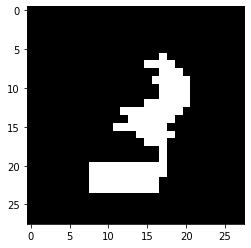

Gen loss: 0.006148232263512909  -  Disc loss: 2.552246682578698


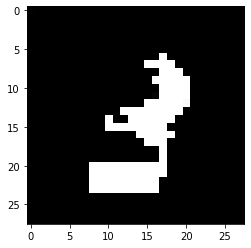

Gen loss: 0.006046191323548555  -  Disc loss: 2.560676699387841


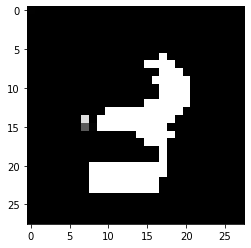

Gen loss: 0.006146976258605719  -  Disc loss: 2.5523057732498273


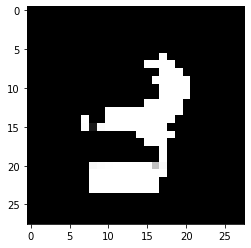

Gen loss: 0.006185884703882039  -  Disc loss: 2.5491589130833745


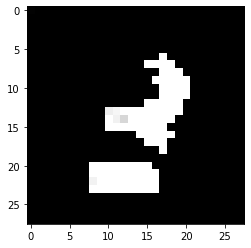

Gen loss: 0.006250930018723011  -  Disc loss: 2.5444823085563257


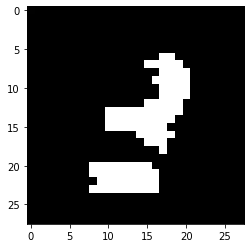

Gen loss: 0.006137570249848068  -  Disc loss: 2.5531724288593978


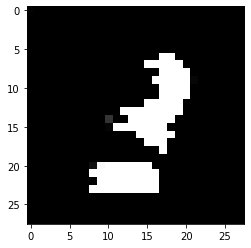

Gen loss: 0.006185466656461358  -  Disc loss: 2.5493269520811737


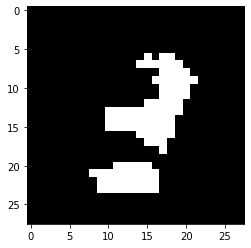

Gen loss: 0.006198868271894753  -  Disc loss: 2.548307223012671


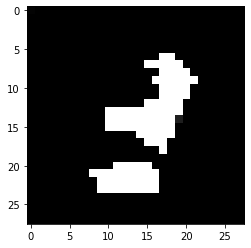

Gen loss: 0.006132264737971127  -  Disc loss: 2.5537736259866506


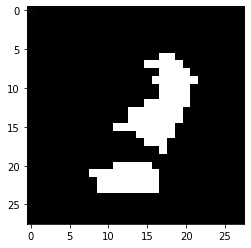

Gen loss: 0.006132104434072971  -  Disc loss: 2.553471521125175


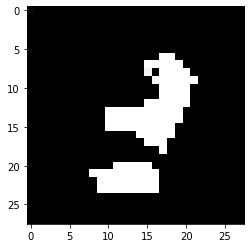

Gen loss: 0.006210735067725182  -  Disc loss: 2.547134004998952


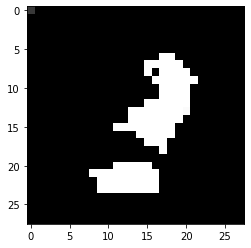

Gen loss: 0.006068647839128971  -  Disc loss: 2.5592202834086493


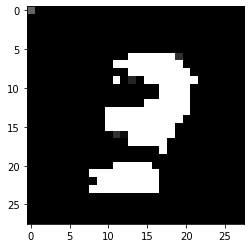

Gen loss: 0.0060921404510736465  -  Disc loss: 2.556847685482353


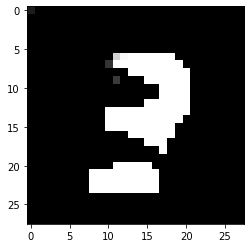

Gen loss: 0.00613698607776314  -  Disc loss: 2.5535782193765044


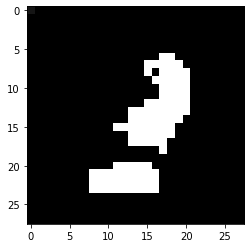

Gen loss: 0.006135228555649519  -  Disc loss: 2.5536057455465198


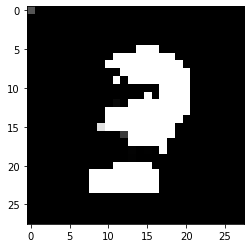

Gen loss: 0.006140801124274731  -  Disc loss: 2.5526870308676735


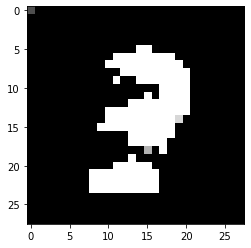

Gen loss: 0.006223986623808742  -  Disc loss: 2.546021808637306


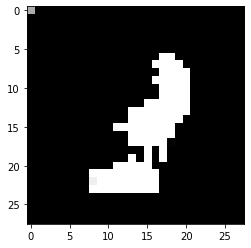

Gen loss: 0.006193213863298297  -  Disc loss: 2.551198066212237


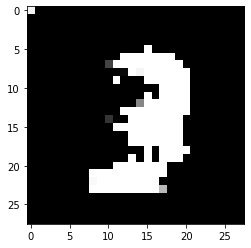

Gen loss: 0.00611644412856549  -  Disc loss: 2.5555642907274887


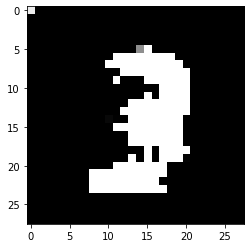

Gen loss: 0.006081867846660316  -  Disc loss: 2.5564258807571605


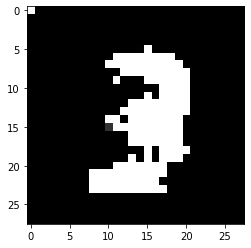

Gen loss: 0.00606940989382565  -  Disc loss: 2.558865199214779


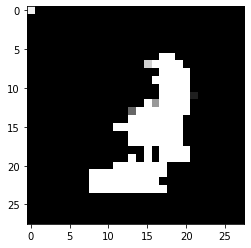

Gen loss: 0.00612524664029479  -  Disc loss: 2.552777915727347


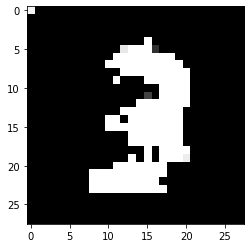

Gen loss: 0.0060570696368813515  -  Disc loss: 2.5589700733544305


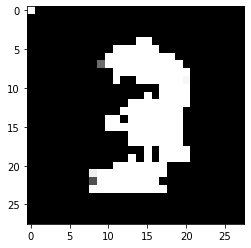

Gen loss: 0.0060702875489369035  -  Disc loss: 2.556970708305016


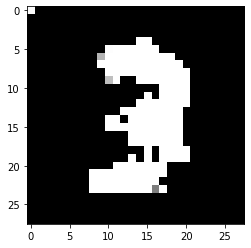

Gen loss: 0.006093166419304907  -  Disc loss: 2.556060449103825


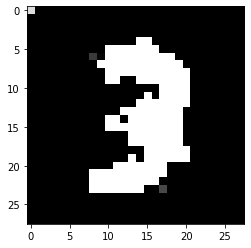

Gen loss: 0.006078220787458122  -  Disc loss: 2.557115836185403


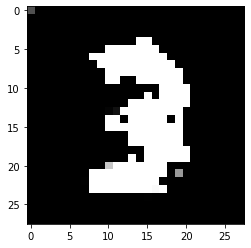

Gen loss: 0.0061175847658887506  -  Disc loss: 2.5549239314859733


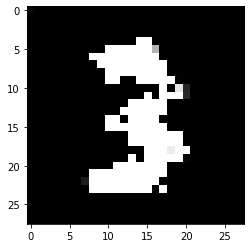

Gen loss: 0.006197617622092366  -  Disc loss: 2.547846165369265


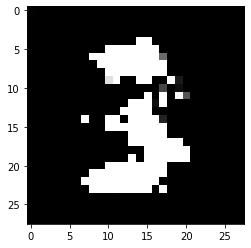

Gen loss: 0.006223783711902797  -  Disc loss: 2.545351768261753


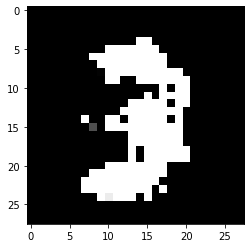

Gen loss: 0.006045898189768195  -  Disc loss: 2.5626839998876676


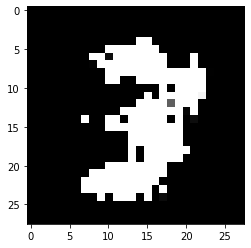

Gen loss: 0.006200044532306492  -  Disc loss: 2.5479352882830426


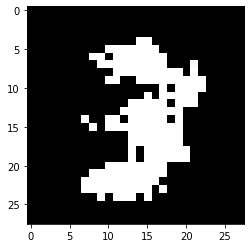

Gen loss: 0.00617768825031817  -  Disc loss: 2.5490985200740397


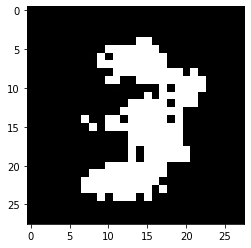

Gen loss: 0.006126784603111446  -  Disc loss: 2.5530635248869658


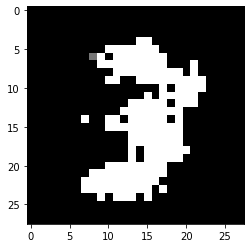

Gen loss: 0.006115624215453863  -  Disc loss: 2.553941217949614


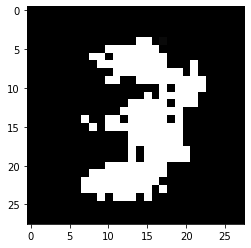

Gen loss: 0.0061620366759598255  -  Disc loss: 2.5500667883316055


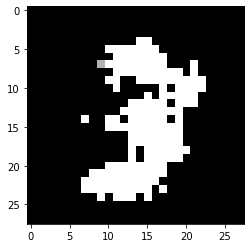

Gen loss: 0.006119938567280769  -  Disc loss: 2.554065394215286


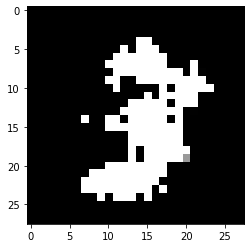

Gen loss: 0.006185360951349139  -  Disc loss: 2.5484598439652473


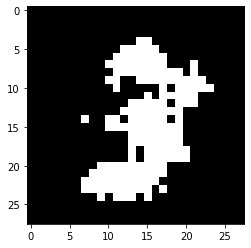

Gen loss: 0.006153813446871936  -  Disc loss: 2.550631220685318


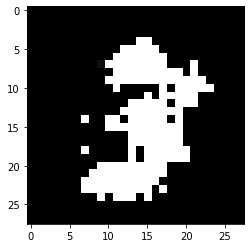

Gen loss: 0.006153108319267631  -  Disc loss: 2.550994821067434


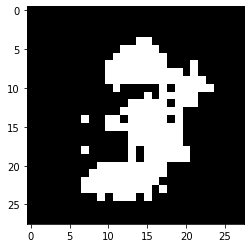

Gen loss: 0.006250663544051349  -  Disc loss: 2.542942155734636


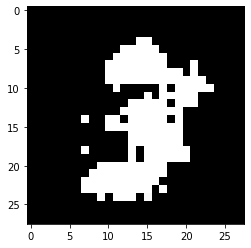

Gen loss: 0.006157399737276137  -  Disc loss: 2.5504851450095885


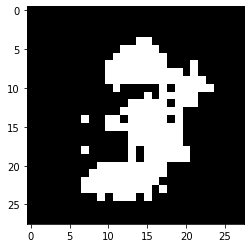

Gen loss: 0.006143338745459914  -  Disc loss: 2.551422794465907


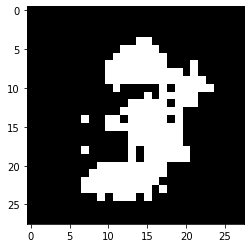

Gen loss: 0.006211723433807492  -  Disc loss: 2.5458652130910195


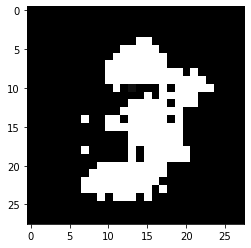

Gen loss: 0.006091799936257303  -  Disc loss: 2.5546379283769056


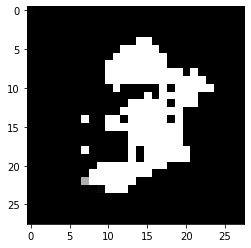

Gen loss: 0.00615832454059273  -  Disc loss: 2.5509501149645075


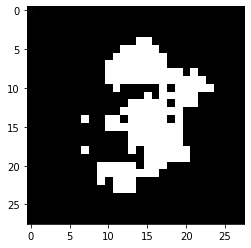

Gen loss: 0.006080862134695053  -  Disc loss: 2.5568992100888863


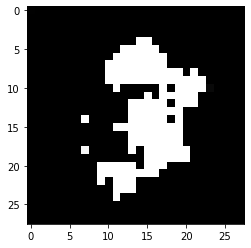

Gen loss: 0.006065431982278824  -  Disc loss: 2.5587326379027218


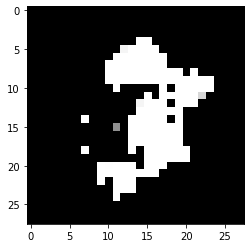

Gen loss: 0.0060765937669202685  -  Disc loss: 2.5577016934985295


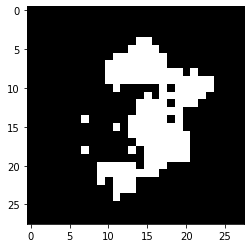

Gen loss: 0.006094257114455104  -  Disc loss: 2.556135457009077


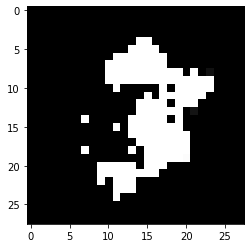

Gen loss: 0.006134810741059482  -  Disc loss: 2.552622143761255


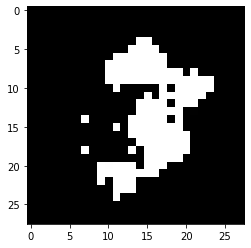

Gen loss: 0.006119114230386913  -  Disc loss: 2.5539139087777585


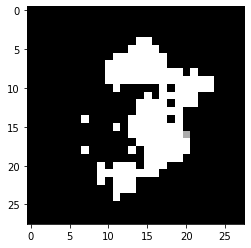

Gen loss: 0.006111010210588574  -  Disc loss: 2.55465027957689


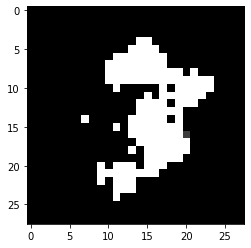

Gen loss: 0.006074861157685518  -  Disc loss: 2.5573030995437875


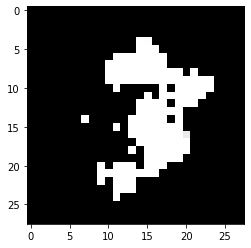

Gen loss: 0.006140102399513125  -  Disc loss: 2.5521864137845114


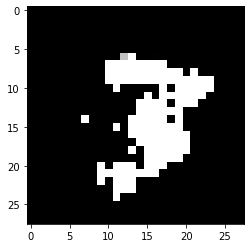

Gen loss: 0.006029073148965836  -  Disc loss: 2.561535320011899


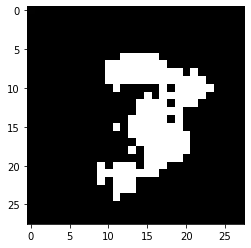

Gen loss: 0.006177209783345461  -  Disc loss: 2.5493900993606076


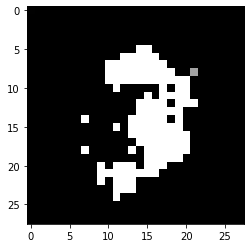

Gen loss: 0.006112077389843762  -  Disc loss: 2.554601203999482


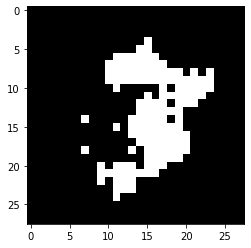

Gen loss: 0.006117830867879093  -  Disc loss: 2.5540271080099046


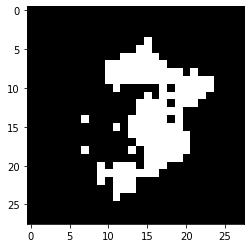

Gen loss: 0.006132964976131916  -  Disc loss: 2.5527666771085933


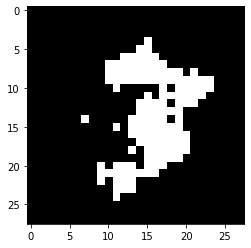

Gen loss: 0.006092814262956381  -  Disc loss: 2.5565844197990373


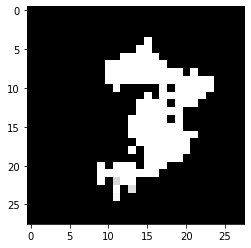

Gen loss: 0.006079257698729634  -  Disc loss: 2.5569964291062206


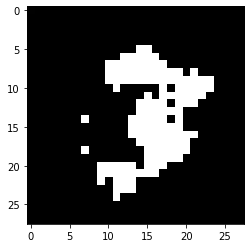

Gen loss: 0.0061462193261832  -  Disc loss: 2.5515687352744862


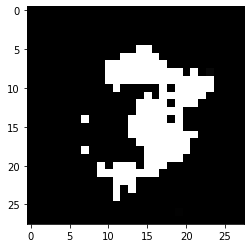

Gen loss: 0.006058319821022451  -  Disc loss: 2.558728572097607


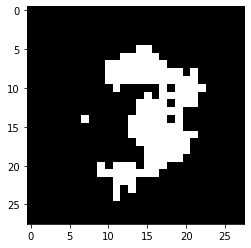

Gen loss: 0.006040811422280967  -  Disc loss: 2.5601051840931177


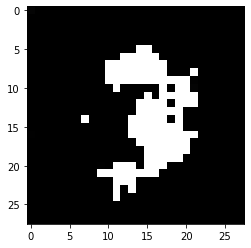

Gen loss: 0.006055852514691651  -  Disc loss: 2.558931927429512


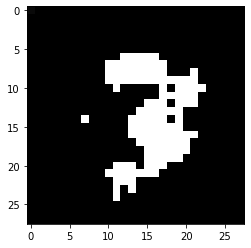

Gen loss: 0.0059774183901026845  -  Disc loss: 2.5669799509923905


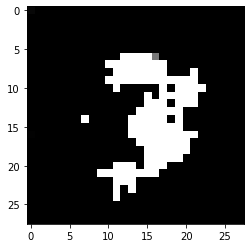

Gen loss: 0.005964917945675552  -  Disc loss: 2.566727168043144


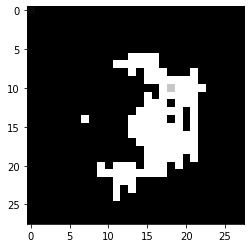

Gen loss: 0.006023318623192608  -  Disc loss: 2.561962960055098


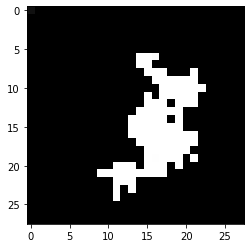

Gen loss: 0.006101088249124587  -  Disc loss: 2.5558263121638447


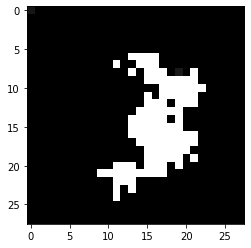

Gen loss: 0.00612629612442106  -  Disc loss: 2.5534762368770316


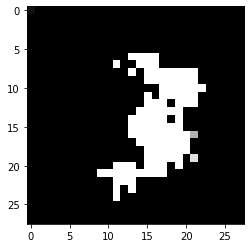

Gen loss: 0.006018264219164848  -  Disc loss: 2.5623858589679003


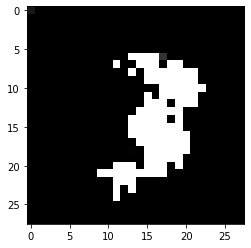

Gen loss: 0.0060249887173995376  -  Disc loss: 2.5618084580637515


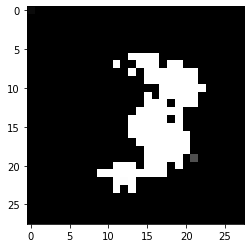

Gen loss: 0.006091285613365471  -  Disc loss: 2.556238481309265


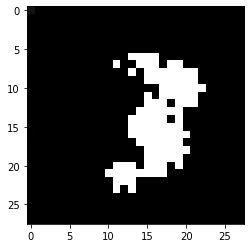

Gen loss: 0.006012763362377882  -  Disc loss: 2.5624466546578333


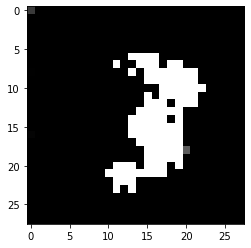

Gen loss: 0.00603980477899313  -  Disc loss: 2.560652258223854


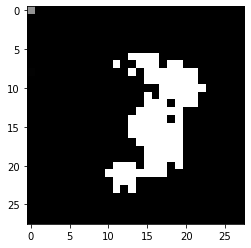

Gen loss: 0.00609654129948467  -  Disc loss: 2.555620503728278


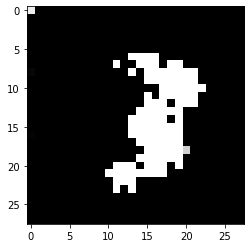

Gen loss: 0.006170233944430947  -  Disc loss: 2.5497189863817766


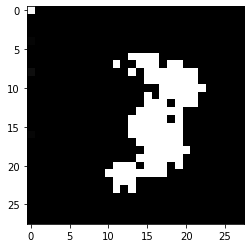

Gen loss: 0.006057107704691589  -  Disc loss: 2.558792485971935


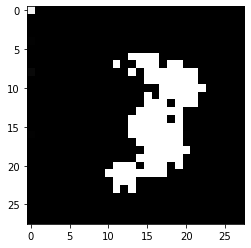

Gen loss: 0.006072863237932324  -  Disc loss: 2.5576936026336625


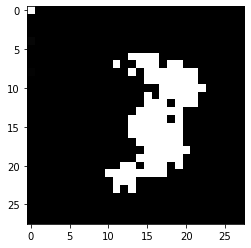

Gen loss: 0.006172397290356457  -  Disc loss: 2.549419022863731


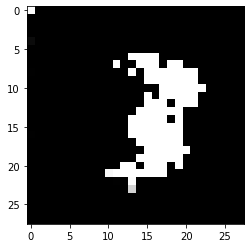

Gen loss: 0.0059919769410043955  -  Disc loss: 2.5642448250437155


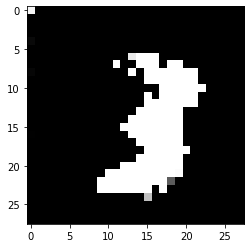

Gen loss: 0.006075949990190566  -  Disc loss: 2.558519766316749


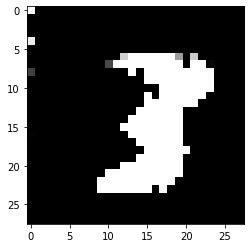

Gen loss: 0.006047888076864183  -  Disc loss: 2.5600578850135207


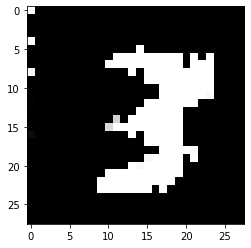

Gen loss: 0.006088199093937874  -  Disc loss: 2.5569271309068426


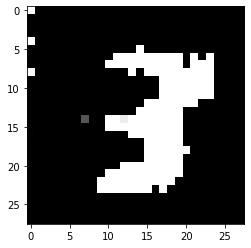

Gen loss: 0.006191486259922385  -  Disc loss: 2.5481522030895576


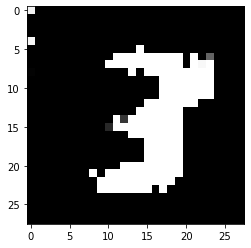

Gen loss: 0.006185757811181247  -  Disc loss: 2.548830599989742


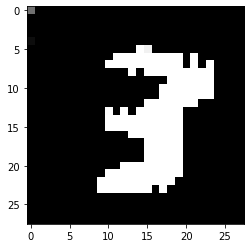

Gen loss: 0.0061803876888006926  -  Disc loss: 2.5491212285123765


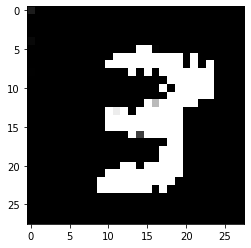

Gen loss: 0.00619947595987469  -  Disc loss: 2.5478112368145958


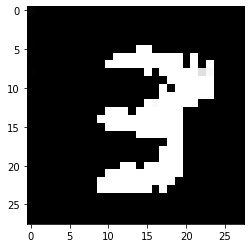

Gen loss: 0.0061880191788077354  -  Disc loss: 2.5481406804174185


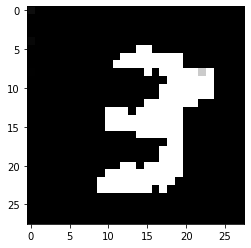

Gen loss: 0.006183009711094201  -  Disc loss: 2.5493389589246362


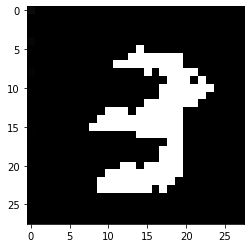

Gen loss: 0.006174599868245423  -  Disc loss: 2.5491544667165726


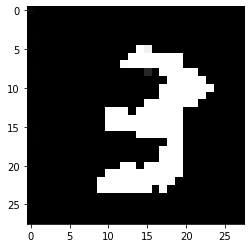

Gen loss: 0.006166233564727008  -  Disc loss: 2.550568485632539


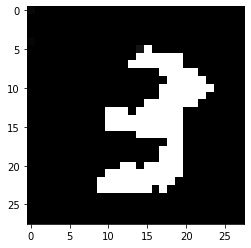

Gen loss: 0.0061800332041457295  -  Disc loss: 2.5489125235471874


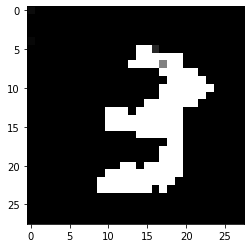

Gen loss: 0.006219450617209077  -  Disc loss: 2.546380353393033


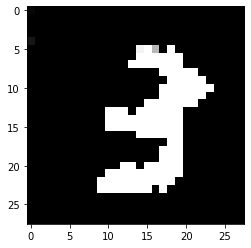

Gen loss: 0.006178225157782435  -  Disc loss: 2.5492878758814186


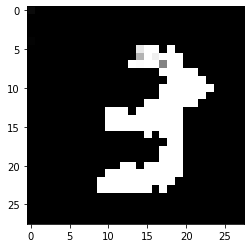

Gen loss: 0.0060797600308433175  -  Disc loss: 2.5572778881760314


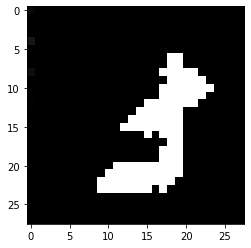

Gen loss: 0.006106853834353387  -  Disc loss: 2.5547621119767427


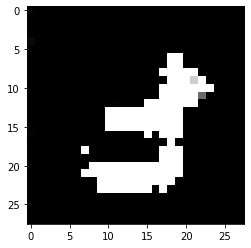

Gen loss: 0.0061246941331774  -  Disc loss: 2.5542135157156736


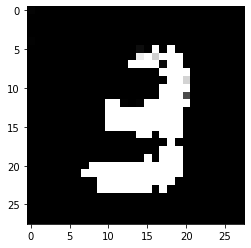

Gen loss: 0.00617888942360878  -  Disc loss: 2.5498103903373703


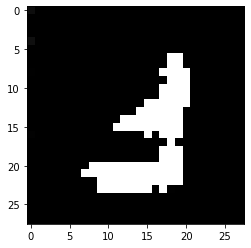

Gen loss: 0.006143592298030853  -  Disc loss: 2.551859804196283


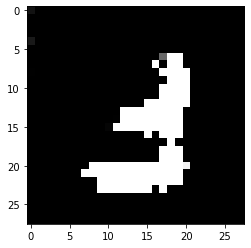

Gen loss: 0.006193968001753092  -  Disc loss: 2.547729923040606


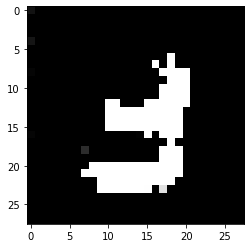

Gen loss: 0.006204234785400331  -  Disc loss: 2.547229293966666


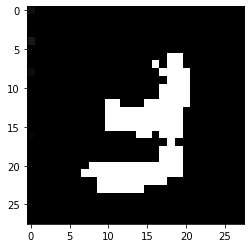

Gen loss: 0.006097988807596266  -  Disc loss: 2.5553132952190936


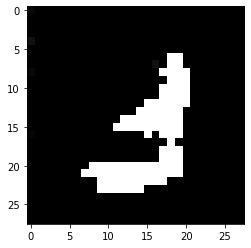

Gen loss: 0.006211035652086139  -  Disc loss: 2.5471580458106473


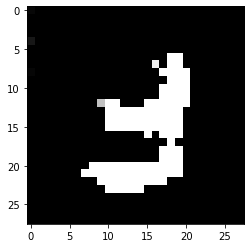

Gen loss: 0.006110475864261389  -  Disc loss: 2.554569699568674


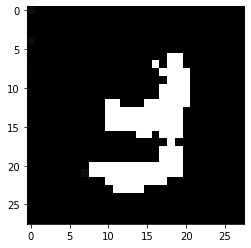

Gen loss: 0.006176236551254988  -  Disc loss: 2.54947101988364


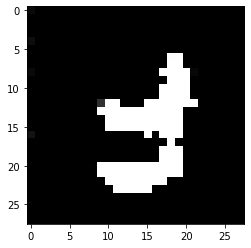

Gen loss: 0.0062376909190788865  -  Disc loss: 2.544775337795727


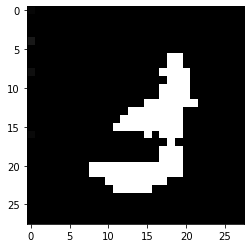

Gen loss: 0.006277221837081015  -  Disc loss: 2.541578665841371


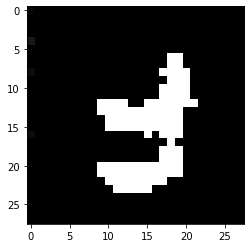

Gen loss: 0.006188000901602209  -  Disc loss: 2.547888921923004


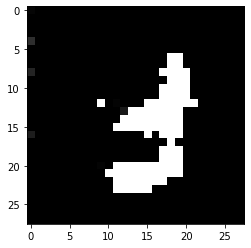

Gen loss: 0.0061905746115371585  -  Disc loss: 2.548627838958055


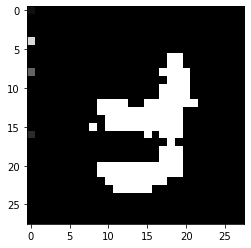

Gen loss: 0.006254343781620264  -  Disc loss: 2.5440581541042775


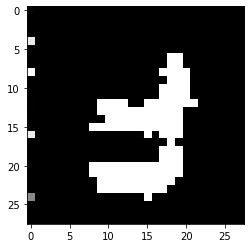

Gen loss: 0.0062571438029408455  -  Disc loss: 2.5431264124345034


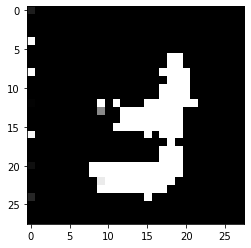

Gen loss: 0.00616161955986172  -  Disc loss: 2.5507317557930946


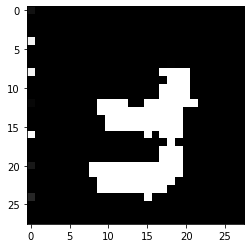

Gen loss: 0.006174515234306455  -  Disc loss: 2.5495911022881046


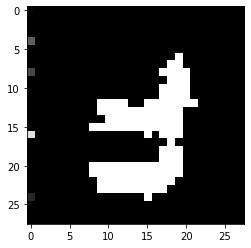

Gen loss: 0.006231072475202382  -  Disc loss: 2.5439937619958073


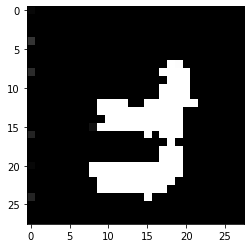

Gen loss: 0.006101322127506137  -  Disc loss: 2.5551973478868604


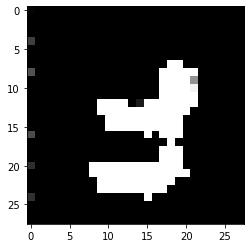

Gen loss: 0.006177060888148844  -  Disc loss: 2.54940041329246


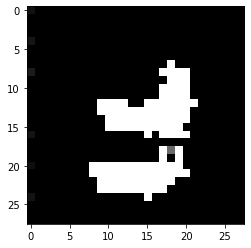

Gen loss: 0.006123537779785693  -  Disc loss: 2.552953402744606


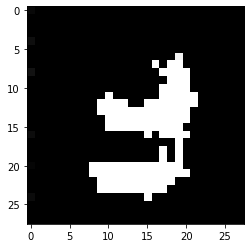

Gen loss: 0.006101897568441927  -  Disc loss: 2.5558928705286235


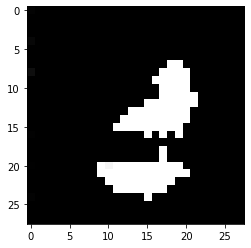

Gen loss: 0.0061136705335229635  -  Disc loss: 2.554790506255813


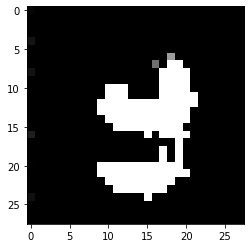

Gen loss: 0.0061305377166718245  -  Disc loss: 2.553553089965135


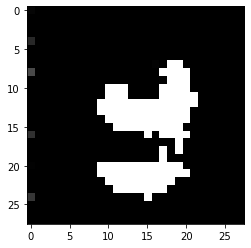

Gen loss: 0.006178450537845492  -  Disc loss: 2.5497892544372007


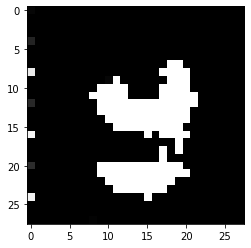

Gen loss: 0.006185578764416277  -  Disc loss: 2.548890251433477


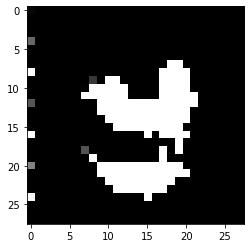

Gen loss: 0.006203102297149599  -  Disc loss: 2.5463980087079108


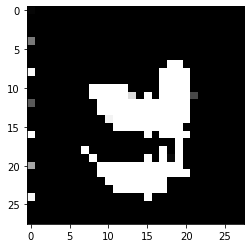

Gen loss: 0.006298223044723272  -  Disc loss: 2.5371910070534796


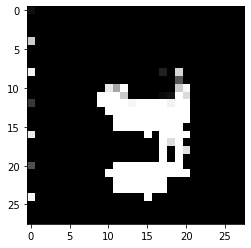

Gen loss: 0.006016193889081478  -  Disc loss: 2.5607168931746855


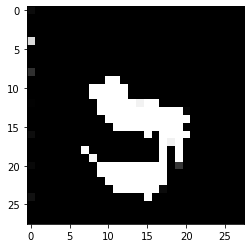

Gen loss: 0.006038429564796388  -  Disc loss: 2.56017259915825


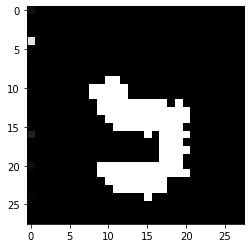

Gen loss: 0.006153107387945056  -  Disc loss: 2.551868516835384


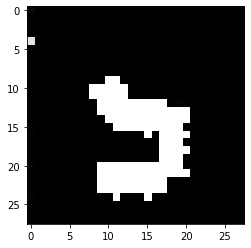

Gen loss: 0.00615497084800154  -  Disc loss: 2.5516539003001526


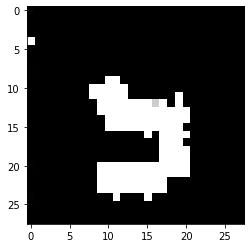

Gen loss: 0.006122069200500846  -  Disc loss: 2.5544719451572746


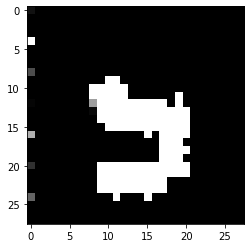

Gen loss: 0.006145515362732112  -  Disc loss: 2.5522673135856166


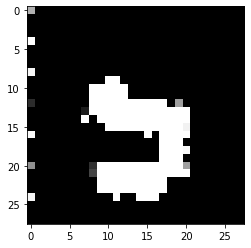

Gen loss: 0.006110766786150634  -  Disc loss: 2.5546045870287344


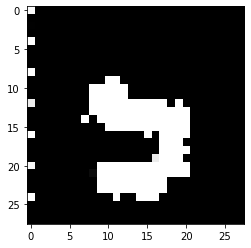

Gen loss: 0.006174313835799694  -  Disc loss: 2.549183931783773


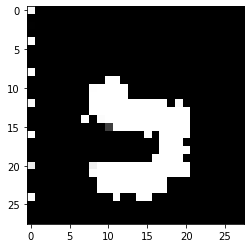

Gen loss: 0.006169058731757104  -  Disc loss: 2.5501734752906486


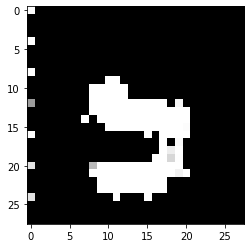

Gen loss: 0.006202761665917933  -  Disc loss: 2.5473258515121415


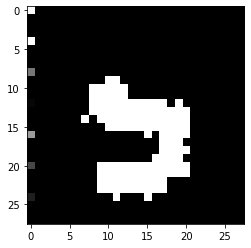

Gen loss: 0.006172284949570894  -  Disc loss: 2.5497424114728346


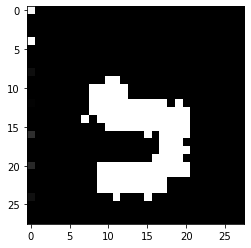

Gen loss: 0.006107455352321267  -  Disc loss: 2.555256135878153


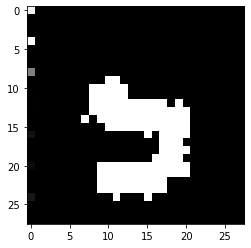

Gen loss: 0.006095130811445415  -  Disc loss: 2.555429795756936


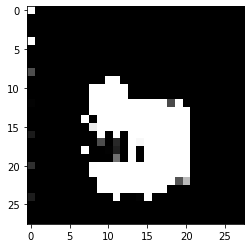

Gen loss: 0.006172113469801843  -  Disc loss: 2.551165622775443


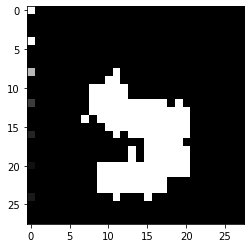

Gen loss: 0.006065285997465253  -  Disc loss: 2.558869712986052


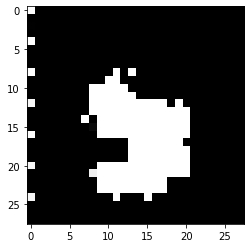

Gen loss: 0.006036147708073258  -  Disc loss: 2.558164626476355


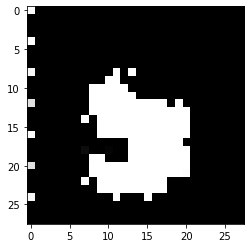

Gen loss: 0.006130344117991626  -  Disc loss: 2.5555750601924956


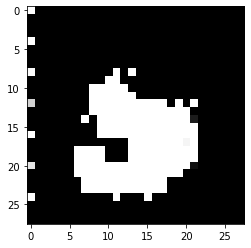

Gen loss: 0.005963467643596232  -  Disc loss: 2.564478385495022


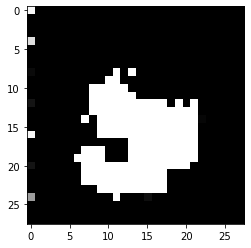

Gen loss: 0.006058031576685607  -  Disc loss: 2.558758433209732


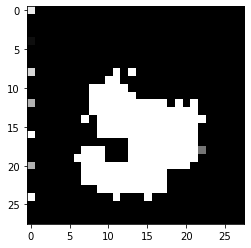

Gen loss: 0.006149189081043005  -  Disc loss: 2.552318702219054


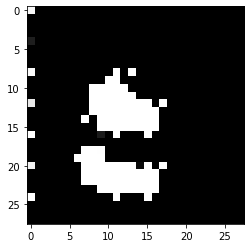

Gen loss: 0.006155295530334115  -  Disc loss: 2.5515358455013484


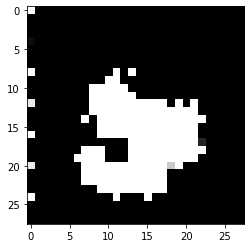

Gen loss: 0.0060998082626610994  -  Disc loss: 2.5555752844084054


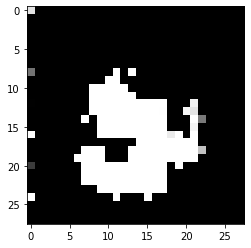

Gen loss: 0.006137919379398227  -  Disc loss: 2.5523143198806792


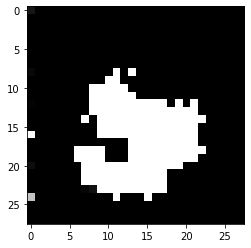

Gen loss: 0.00610202073585242  -  Disc loss: 2.5552801568992436


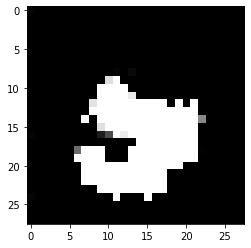

Gen loss: 0.0061025688191875815  -  Disc loss: 2.5560540019068867


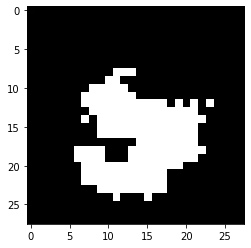

Gen loss: 0.006182806915603578  -  Disc loss: 2.549064183025621


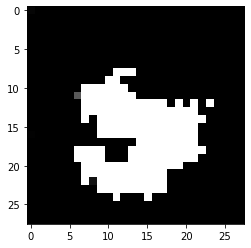

Gen loss: 0.006263927090913057  -  Disc loss: 2.541656388435513


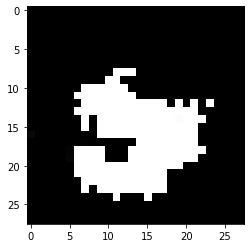

Gen loss: 0.006078539532609284  -  Disc loss: 2.5574683201266453


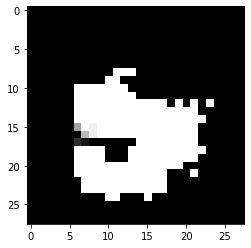

Gen loss: 0.006139284698292613  -  Disc loss: 2.554224338149652


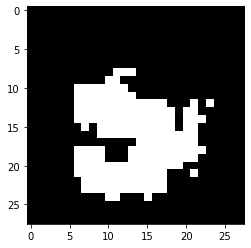

Gen loss: 0.0062817547004669905  -  Disc loss: 2.541664653457701


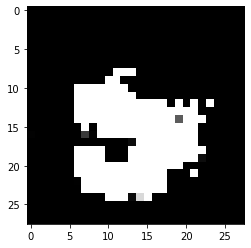

Gen loss: 0.006162227946333587  -  Disc loss: 2.5509907878004014


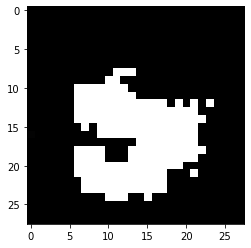

Gen loss: 0.006184238358400762  -  Disc loss: 2.5489916778169572


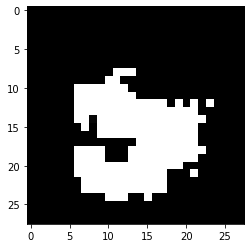

Gen loss: 0.006175837712362409  -  Disc loss: 2.549965927028097


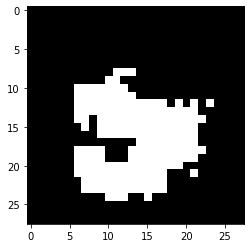

Gen loss: 0.006089473492465913  -  Disc loss: 2.5558592214947566


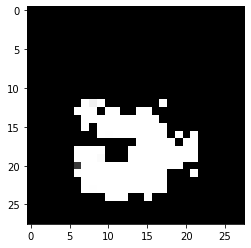

Gen loss: 0.0061261303490027785  -  Disc loss: 2.5536442059092224


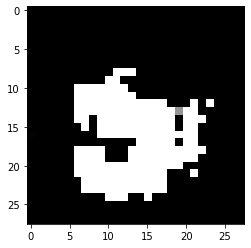

Gen loss: 0.0062743519665673375  -  Disc loss: 2.539001150871627


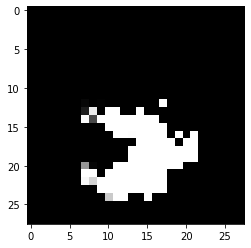

Gen loss: 0.006080171442590654  -  Disc loss: 2.560055024572648


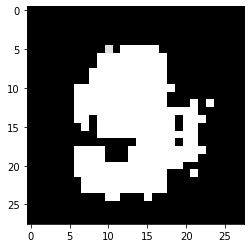

Gen loss: 0.006035907077603042  -  Disc loss: 2.559608519077301


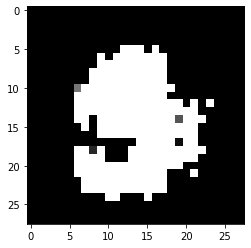

Gen loss: 0.006109437788836658  -  Disc loss: 2.556575032067485


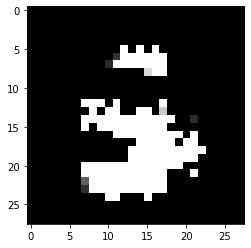

Gen loss: 0.006055732257664204  -  Disc loss: 2.5606354320188984


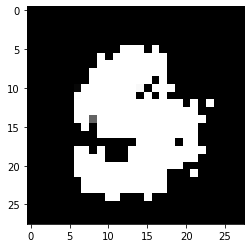

Gen loss: 0.006142666796222329  -  Disc loss: 2.552793324110098


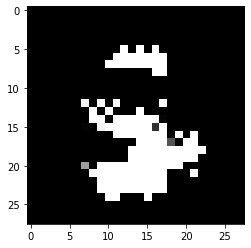

Gen loss: 0.00612159667070955  -  Disc loss: 2.5533770375186577


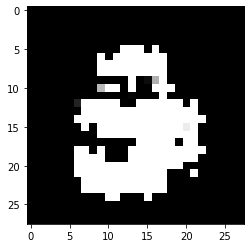

Gen loss: 0.006191286724060774  -  Disc loss: 2.548435858800076


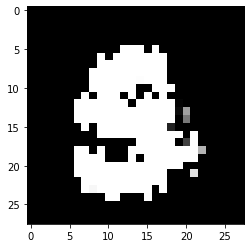

Gen loss: 0.006295345607213676  -  Disc loss: 2.5419777939096093


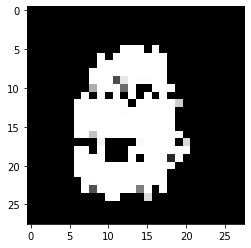

Gen loss: 0.00625881552696228  -  Disc loss: 2.5452600056305528


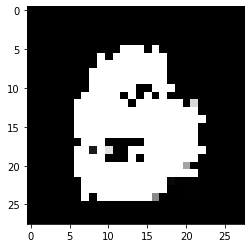

Gen loss: 0.006192283588461578  -  Disc loss: 2.5497135868063197


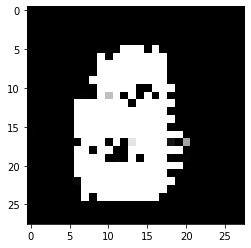

Gen loss: 0.006191369611769915  -  Disc loss: 2.5513022157829255


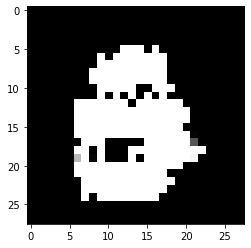

Gen loss: 0.0061503726756200194  -  Disc loss: 2.552734301891178


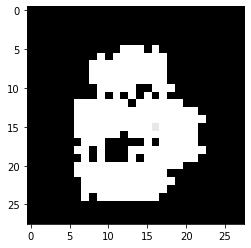

Gen loss: 0.006132101989351213  -  Disc loss: 2.5533386754104868


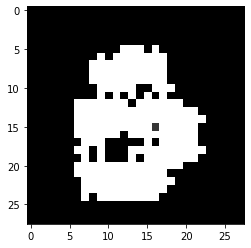

Gen loss: 0.006197911221534014  -  Disc loss: 2.5501303350320086


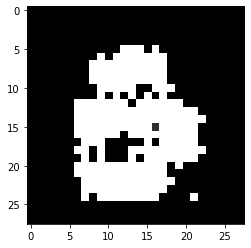

Gen loss: 0.006292686564847827  -  Disc loss: 2.5473387819947675


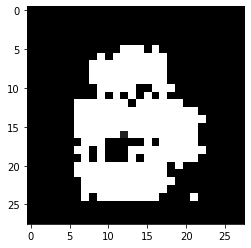

Gen loss: 0.0061801004922017455  -  Disc loss: 2.5478295126231387


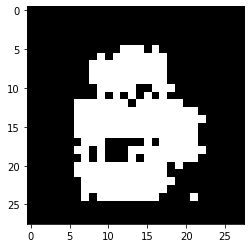

Gen loss: 0.006278187618590891  -  Disc loss: 2.5429689361480996


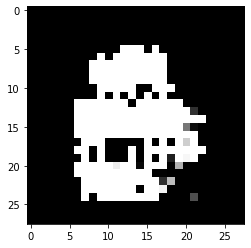

Gen loss: 0.006232852349057794  -  Disc loss: 2.5450711605371907


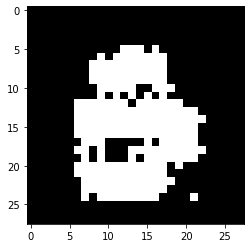

Gen loss: 0.006287545198574662  -  Disc loss: 2.542513962020166


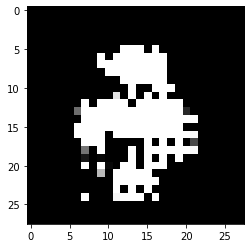

Gen loss: 0.006187903578393161  -  Disc loss: 2.546089716604911


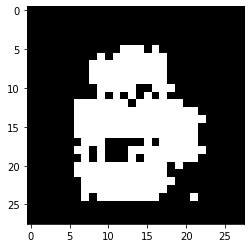

Gen loss: 0.00627257872838527  -  Disc loss: 2.5409618262201548


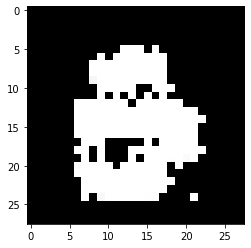

Gen loss: 0.006254691164940596  -  Disc loss: 2.5429161705542356


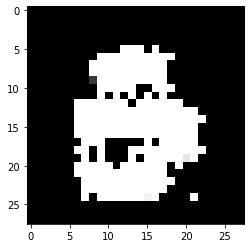

Gen loss: 0.0061089720111340284  -  Disc loss: 2.55696426006034


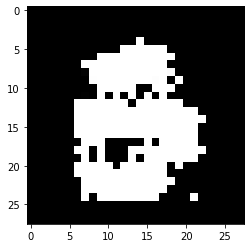

Gen loss: 0.006186761660501361  -  Disc loss: 2.547479969682172


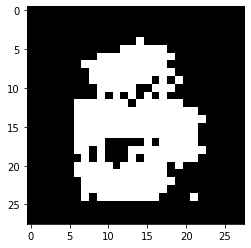

In [ ]:
steps = 100000
batch_size = 256

for i in range(steps):
    
    real_images = X_train[np.random.randint(0, X_train.shape[0], size=batch_size//2)]
    fake_images = generator.predict(np.random.rand(batch_size//2, 100)*2-1)
    
    discriminator.trainable = True
    discriminator.train_on_batch(np.concatenate([real_images, fake_images], axis=0),
                      np.concatenate([np.ones(batch_size//2), np.zeros(batch_size//2)]))
    
    discriminator.trainable = False
    generator.trainable = True
    generator_discriminator.train_on_batch(np.random.rand(batch_size//2, 100)*2-1,
                                           np.ones(batch_size//2))
    
    
    if i%100 == 0:
        
        gen_loss = generator_discriminator.evaluate(np.random.rand(batch_size//2, 100)*2-1,
                                                    np.ones(batch_size//2), verbose=False)
        dis_loss = discriminator.evaluate(np.concatenate([real_images, fake_images]),
                                      np.concatenate([np.ones(batch_size//2), np.zeros(batch_size//2)]),
                                      verbose=False)
    
        print(f"Gen loss: {gen_loss}  -  Disc loss: {dis_loss}")

        fake_img = generator.predict(np.random.rand(1, 100)*2-1)[0]
        plt.imshow(fake_img[:,:,0], cmap="gray")
        plt.show()

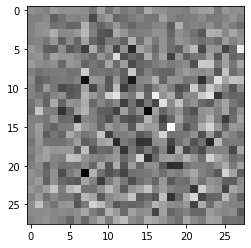

In [9]:
fake_img = generator.predict(np.random.rand(1, 100)*2-1)[0]
plt.imshow(fake_img[:,:,0], cmap="gray")
plt.show()

In [52]:
60000/256

234.375

In [53]:
234*50

11700